<center><font size=6> Bank Churn Prediction </font></center>

Neural Network model design to predict customer churn, optimizing for accuracy and computational efficiency.

## <font size=5 color='#ADD8E6'>Executive Summary --------------------------------------------------------------------- Section</font>

Is it possible to predict **which customers** are highly likely to leave the bank within 6 months? We will design a ANN to answer the question.

## <font size=5 color='#ADD8E6'>Busines Needs Overview & Problem Statement  -------------------------- Section</font>

### Context & Objective

BUSINESS:
- Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

ENGINEERING:
- You as a Data scientist with the bank need to build a neural network based classifier that can determine *whether a customer will leave the bank or not in the next 6 months*.

## <font size=5 color='#ADD8E6'>Engineering ANN Design Strategy & General Approach ---------------------------------- Section</font>

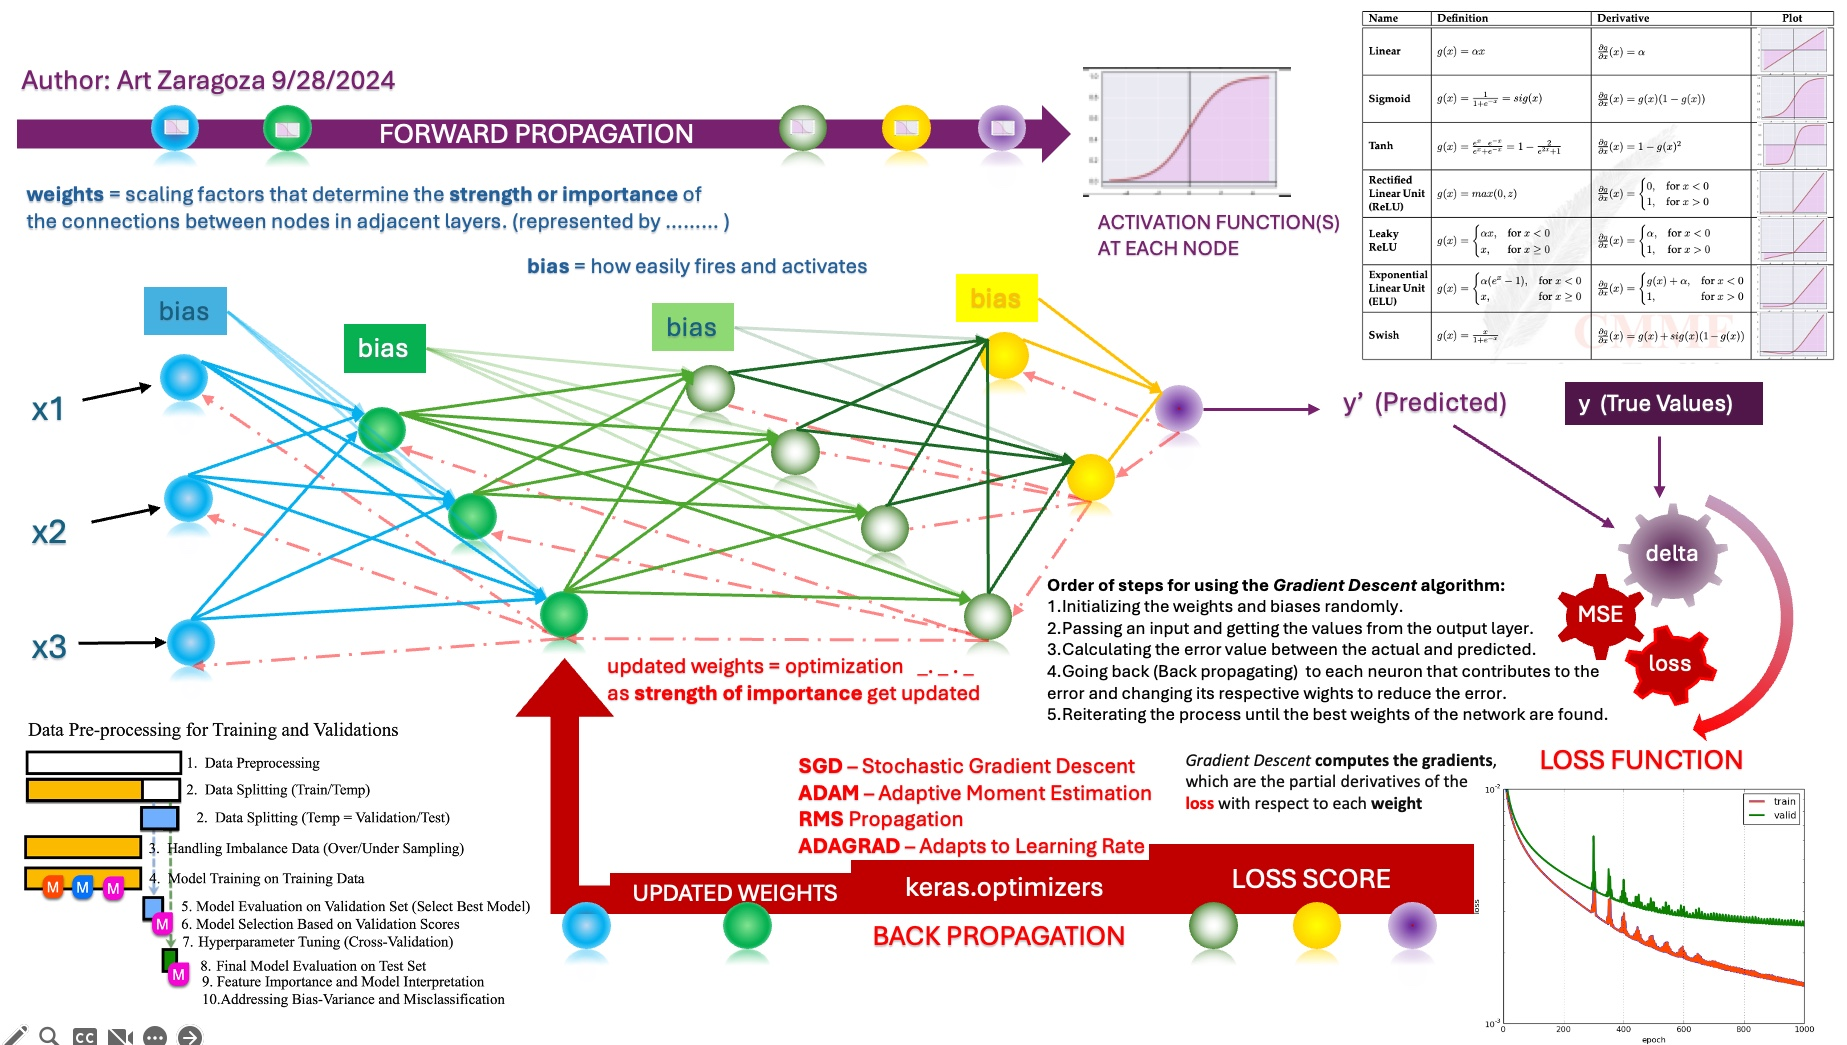

### Data Dictionary

<table>
 <tr><th>#</th><th>Feature</th><th>Description</th></tr>
 <tr><td>1<td>CustomerId<td>Unique ID which is assigned to each customer.</td></tr>
 <tr><td>2<td>Surname<td>Last name of the customer.</td></tr>
 <tr><td>3<td>CreditScore<td>It defines the credit history of the customer.</td></tr>
 <tr><td>4<td>Geography<td>A customer’s location.</td></tr>
<tr><td>5<td>Gender<td>It defines the Gender of the customer.</td></tr>
<tr><td>6<td>Age<td>Age of the customer</td></tr>
<tr><td>7<td>Tenure<td>Number of years for which the customer has been with the bank.</td></tr>
<tr><td>8<td>NumOfProducts<td>Uumber of products that a customer has purchased through the bank.</td></tr>
<tr><td>9<td>Balance<td>Account balance</td></tr>
<tr><td>10<td>HasCrCard<td>It is a categorical variable which decides whether the customer has credit card or not.</td></tr>
<tr><td>11<td>EstimatedSalary<td>UEstimated salary</td></tr>
<tr><td>12<td>IsActiveMember<td>Is a categorical variable where custmomer is using bank products regularly, making transactions etc )</td></tr>
<tr><td>13<td>Exited<td>Customer left the bank within six month. 0 = No or 1 = Yes ( Customer left the bank )</td></tr>
 </table>

## Importing necessary libraries

In [2]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

**Note:** After running the above cell, please restart the notebook kernel/runtime (depending on whether you're using Jupyter Notebook or Google Colab) and then sequentially run all cells from the one below.

In [1]:
# Libraries for reading and manipulating data
import pandas as pd
import numpy as np

# Libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Library to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Importing SMOTE
from imblearn.over_sampling import SMOTE

# Importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Verifiyng installed versions. - EXTRA CREDIT
print('\nLibraries imported for Exploratory Data Analysis \n(EDA - Univariate and Multivariate):\n')
print("For Numerical Operations and Statistical Analysis of Data:")
print(" . Pandas version:", pd.__version__)
print(" . NumPy version:", np.__version__)
print("\nFor Visualization of Data: ")
print(" . Matplotlib version:", plt.rcParams['figure.figsize'])
print(" . Seaborn version:", sns.__version__)
print("\nFor Machine Learning Models:", tf.__version__)
print(" . Tensorflow version:", tf.__version__)
print(" . Keras version:", keras.__version__)


Libraries imported for Exploratory Data Analysis 
(EDA - Univariate and Multivariate):

For Numerical Operations and Statistical Analysis of Data:
 . Pandas version: 2.2.2
 . NumPy version: 1.26.4

For Visualization of Data: 
 . Matplotlib version: [6.4, 4.8]
 . Seaborn version: 0.13.2

For Machine Learning Models: 2.17.0
 . Tensorflow version: 2.17.0
 . Keras version: 3.4.1


In [3]:
# GPU Processing Resources
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Oct 12 20:13:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Loading the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive') # Mount drive

Mounted at /content/drive


In [5]:
ds = pd.read_csv("Churn.csv")  # Load raw dataset

## Data Overview

### View the first and last 5 rows of the dataset. - - Data Overview

In [6]:
ds.head() # Top 5 rows of the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
ds.tail() # Last 5 rows of the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### View a random set of rows (seeded = reproducible). -- Data Overview

In [8]:
ds.sample(n=7, random_state=42)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6252,6253,15687492,Anderson,596,Germany,Male,32,3,96709.07,2,0,0,41788.37,0
4684,4685,15736963,Herring,623,France,Male,43,1,0.00,2,1,1,146379.30,0
1731,1732,15721730,Amechi,601,Spain,Female,44,4,0.00,2,1,0,58561.31,0
4742,4743,15762134,Liang,506,Germany,Male,59,8,119152.10,2,1,1,170679.74,0
4521,4522,15648898,Chuang,560,Spain,Female,27,7,124995.98,1,1,1,114669.79,0
6340,6341,15659064,Salas,790,Spain,Male,37,8,0.00,2,1,1,149418.41,0
576,577,15761986,Obialo,439,Spain,Female,32,3,138901.61,1,1,0,75685.97,0


### Shape of the dataset check. - - Data Overview

In [9]:
ds.shape # Number of rows and columns in the training data

(10000, 14)

Observations:

- There are 10k rows with 14 columns in the Churn.csv.

### Data types check of the columns for the dataset. - - Data Overview

In [10]:
ds.info() # Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Observations:
- There are 10k observations and 14 columns.
- 3 Columns are object datatype.
- 11 columns are numerical.
- There appears to be no missing data in all the columns as they match the size of the dataset.

### Statistical Summary Check. - - Data Overview

In [11]:
# EXTRA CREDIT

# Note: Statistical information is obtained for numerical datatypes only, as shown below. There are only 11: (2) float64, (9) int64.
# Using a lamda function for rounding off to 2 digits the minimum, the average, and the maximum.
# Note: RowNumber & CustomerId statistics are not relevant and do not make sense other than in combination with other variables.

ds.describe().applymap(lambda x: round(x, 2)).T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.0,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48


Observations:
- Statistical information is obtained for numerical datatypes only, as shown below. There are only 11: (2) float64, (9) int64.
- Using a lamda function for rounding off to 2 digits the minimum, the average, and the maximum.
- RowNumber, CustomerId have numerical values but their statistics are not relevant and do not make sense other than in combination with other variables.
- The average Age of all Customers is 39 years.
- 75% of Customers have been with the bank for about 7 years with and average of 5 years.
- The average Customer balance is 76.5k.
- 70% of all Customers have Credit Cards.
- The average salary of Customers is 100k.

### Missing Values Check. - - Data Overview

In [12]:
ds.isnull().sum() #  Checking for missing values in the dataset.

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


Observations:
- There appears to be no missing data in all the columns as they match the size of the dataset. (Just like with datatype output info above.)
*   However, we must still check for <font color =red>`NaN`</font> and <font color =red>`Not given`</font> wherever these values are present, potentially affecting our calculations.

In [14]:
# EXTRA CREDIT: FUNCTIONS AND HANDLING FOR 'NaN' and 'Not given'
# Check for NaN values in the dataset
nan_values = ds.isna().sum()
print("\n'NaN' Values in each column:\n", nan_values)

# Check for "Not given" (as a string) in the dataset
not_given_values = (ds == "Not given").sum()
print("\n'Not given' values in each column:\n", not_given_values)

# Replace "Not given" with NaN, so we can handle all missing data uniformly
# ds.replace("Not given", pd.NA, inplace=True)

# Check again after replacing 'Not given' with NaN
#print("\nAfter replacing 'Not given' with NaN, NaN values in each column:\n", ds.isna().sum())

# Optionally, you can handle the NaN values by dropping them or filling them with a default value
# For example, filling missing values with the median of each column
# ds.fillna(ds.median(), inplace=True)

# Print the dataset to ensure missing values are handled
# print("\nDataset after handling missing values:\n", ds)


'NaN' Values in each column:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

'Not given' values in each column:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Observations:
* There are no NaN nor Not Given entries in our dataset.

### Duplicates check. - - Data Overview

In [15]:
ds.duplicated().sum() # Check for duplicate values in the data

0

### Unique values check for each of the column. - - Data Overview

In [16]:
ds.nunique() # Number of Unique Values (Groups)

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


Observations:
- These two numeric columns and this string column do not provide insights and could be candidates for dropping: RowNumber, CustomerId and Surname.
- The following columns have large variations of values: CreditScore, Age, Tenure, Balance and EstimatedSalary.

### Distribution of Targeted column (Exited = 1) - - Data Overview

In [17]:
ds["Exited"].value_counts(1)

,proportion
Exited,
0,0.7963
1,0.2037


Observations:
- Approximately 20% of all Customers have exited.
- 20%  is unacceptably high for any business.

In [18]:
ds['Geography'].value_counts()# Data frequency categories.

,count
Geography,
France,5014
Germany,2509
Spain,2477


Observations:
* 50% of Customers are from France and the remaining half are equally divided between Germany and Spain.

Recommendations:
* Right off the bat, bank offerings must include services in three languages: French, German and Spanish.
* There are twice as many French customers, therefore the marketing and customer support and customer retention budgets should reflect the same.
* Bots or AI assistants should provide culture and language sensitivity to reflect customer's distribution.
* Important: EU AI Act applies to all 3 countries and the bank must follow these regulations with strict compliance.

In [19]:
ds['Gender'].value_counts() # Data frequency categories.

,count
Gender,
Male,5457
Female,4543


Observations:
- The number of Males and Females are about the same, however there are about 1,000 more males than females or 10% **more** of all Customers are males.

Recommendations:
- Great opportunity to increase adoption of services by targeting the female population to enroll in the bank.
- It is crucial that the marketing advertising and customer services are gender sensitive to ensure respect and recruitment towards both genders, but more so towards females.

In [20]:
ds['Tenure'].value_counts() # Data frequency categories.

,count
Tenure,
2,1048
1,1035
7,1028
8,1025
5,1012
3,1009
4,989
9,984
6,967


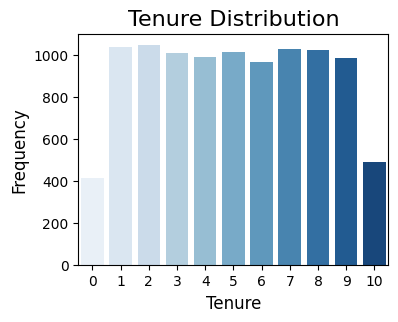

In [22]:
# Set the figure size and plot the bar plot
plt.figure(figsize=(4,3))
sns.countplot(x='Tenure', data=ds, palette='Blues')

# Adding labels and title
plt.title('Tenure Distribution', fontsize=16)
plt.xlabel('Tenure', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

Observations:
- Customers are mostly distributed between 1 - 9 years of Tenure.
- For each year of Tenure, the number of Customers floats around 900 - 1100.

In [ ]:
ds['NumOfProducts'].value_counts() # Data frequency categories.

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


Observations:
- The majority of Customers use 1 or 2 bank products.
- About half of Customers use one product and less than half use two.
- An extremely small number uses 3 (266 Customers) and only 60 uses 4 services.

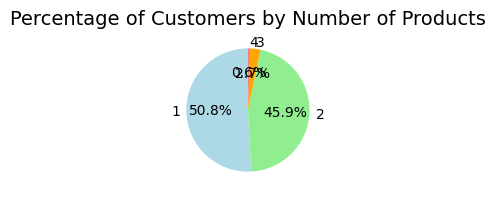

In [26]:
import matplotlib.pyplot as plt

# Get the frequency of each category in 'NumOfProducts'
product_counts = ds['NumOfProducts'].value_counts()

# Plot pie chart
plt.figure(figsize=(2, 2))  # Set the figure size
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'orange', 'lightcoral'])

# Adding title
plt.title('Percentage of Customers by Number of Products', fontsize=14)

# Show the pie chart
plt.show()

Observations:
* 1/2 of all Customers are using one of the bank's offerings.
* Less than the remaining half are using 2 offerings.
* Very few use 3 and a handful uses all 4 offerings.

Recommendations:
* Those that have one of the offerings are best target candidates to get 2 offerings due to familiarity and experience.
* Customer Satisfaction research should be considered to prevent nearly 1/2 or 46% of all customers from dropping one of the 2 offerings. Retention is crucial for revenue stability.


In [ ]:
ds['HasCrCard'].value_counts() # Data frequency categories.

,count
HasCrCard,
1,7055
0,2945


Observations:
* About a third of all Customers do not have a bank's credit card.
* More precisely 2,945 out of 7,055 Customers are not using an important bank offerings.

Recommendations:
* Target Customers without credit cards to increase conversion.
* Increase incentives for Customers without credit card.
* Increase Customer's credit card retention by customer satisfaction research.
* Design offers with attractive balance transfers to those Customers with other institutions credit cards.
* Determine which Customers with credit cards are at risk of loosing their credit card services to ensure they remain revenue-worthy. Ensure is a win-win for both the customer and the bank.

In [ ]:
ds['IsActiveMember'].value_counts() # Data frequency categories.

,count
IsActiveMember,
1,5151
0,4849


Observations:
* Only about half of Customers are actively conducting transactions or using bank products.
* This is catastrophic. Deeper research is needed here to understand the root causes.

Recommendations:
* Provide a budget to research contributing factors for the lack of resonable transactions.
* Is there an "average" baseline of ideal or optimum Customers average transactions meetrics? If not, one MUST be establish ASAP.
* Once this baseline is established, it can be used as a treshold metric and an alarm or "signal" should be triggered for all Customers NOT crossing it.

In [ ]:
ds['Exited'].value_counts()  # Data frequency categories.

,count
Exited,
0,7963
1,2037


Observations:
* A fairly large number of Customers are no longer active customers within the last 6 months.
* More precisely 2037 out of 7963 (26.6%) or a quarter of all customers leave. This is not acceptable.

Recommendations:
* A predictive NN model should be designed to anticipate Customer trends and provide opportunities to interject before is too late. (This project. :-) )
* Daily runs in production should provide 'alerts' whenever patterns are detected or treshold metrics are crossed with production or unseen data.
* The predictive model should be fine-tuned regularly to incorporate additional data values accounting for the preventative-actions and measure both their exit-recurrence effectiveness to the business and the efficiency of the model predictions.
* Transparency of Customer's Privacy protections should be auditable and test-demonstrated frequently as this model is predictive and could cause incorrect, even catastrophic communications to Customers and Regulators when biased.

In [ ]:
(ds['Balance'] == 0).sum() # Number of Customers with 0 Balance in their accounts.

3617

Observations:
* A fairly large number of Customers are keeping a 0 balance in their accounts.
* More precisely 3,617 out of 10,000 (36.2%) or a third of all customers.
Recommendations:
* More research is required in this area. A budget for research should be added to understand contributing factors and corrective actions, RCCAs (Root Cause Corrective Actions).
* Incentives should be studied to provide value-add to these customers as a win-win for them and for the bank.

In [28]:
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1) # RowNumber, CustomerId and Surname are all unique therefore these columns can be dropped

Recommendation:
* There's no need to keep RowNumber, CustomerID and Surname data for statistical analysis nor for our purposes. These can be dropped.

In [29]:
print("\nRowNumber, CustomerID and Surname data were dropped and Gender and Geography are Object datatypes.", "\nRemaining numeric data:\n")
ds.describe().applymap(lambda x: round(x, 2)).T # Gender & Geography not listed as they are Object datatype as the remaining columns not listed below.


RowNumber, CustomerID and Surname data were dropped and Gender and Geography are Object datatypes. 
Remaining numeric data:



,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48
Exited,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


Observations:
* Gender & Geography not listed as they are Object datatype.
* Ave Credit Score of Customers is 650.
* Customers range in age from 18 - 92 years of age.
* Ave Tenure of Customer is 5 years.
* Balance ranges from $0.0 - $251k with an ave of $76.4k
* Ave number of bank products is slightly higher than one product out of 4 products available.
* Less than a 1/4 of Customers do not have credit cards from the bank.
* About 1/4 of all Customers are not actively engage with the bank offerings.
* Ave Salarie of Customers is about 100k.

## <font size=5 color='#ADD8E6'>Exploratory Data Analysis - EDA --------------------------------------------- Section</font>

### Univariate Analysis - EDA

In [30]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [31]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

In [32]:
# EXTRA CREDIT - Function expanded to include Mean and Median to be displayed on plot.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined with the mean value displayed on the histogram.

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    # Create the boxplot
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # Boxplot with the mean indicated

    # Create the histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="skyblue"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # Histogram

    # Calculate mean and median
    mean_val = data[feature].mean()
    median_val = data[feature].median()

    # Add mean and median lines to the histogram
    ax_hist2.axvline(mean_val, color="green", linestyle="--", label=f'Mean: {mean_val:.2f}')
    ax_hist2.axvline(median_val, color="black", linestyle="-", label=f'Median: {median_val:.2f}')

    # Display the value of the mean on the plot
    ax_hist2.text(mean_val, ax_hist2.get_ylim()[1] * 0.8, f'Mean: {mean_val:.2f}',
                  color='green', fontsize=12, ha='center')

    # Optionally, display the value of the median on the plot
    ax_hist2.text(median_val, ax_hist2.get_ylim()[1] * 0.7, f'Median: {median_val:.2f}',
                  color='black', fontsize=12, ha='center')

    # Add a legend to the plot
    ax_hist2.legend()

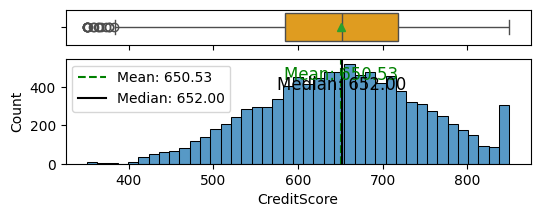

In [33]:
histogram_boxplot(ds, 'CreditScore', figsize=(6, 2)) # Histogram_boxplot for Credit Score.

Observations:
* Histogram displays a uniform distribution centering on a Median of 652.
* A number of outliers on the lower scores and a spike on the highest score.

Recommendations:
* Data preprocessing-handling candidates are both the outliers and Customers contributing to the band with highest credit score.

#### Observations on Age

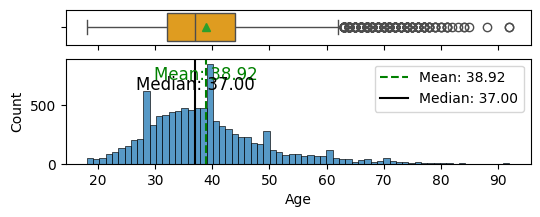

In [ ]:
histogram_boxplot(ds, 'Age', figsize=(6, 2)) # Histogram_boxplot for Age.

Generation
Silent Generation       0
Baby Boomers          811
Generation X         6295
Millennials          2306
Generation Z          564
Generation Alpha       24
Name: count, dtype: int64


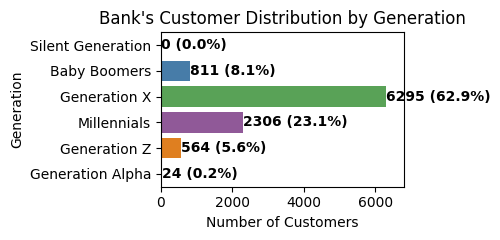

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the age ranges and generation labels
generation_labels = ['Silent Generation', 'Baby Boomers', 'Generation X', 'Millennials', 'Generation Z', 'Generation Alpha']
bins = [0, 11, 27, 43, 59, 78, 96]

# Create a new column for the generations
ds['Generation'] = pd.cut(ds['Age'], bins=bins, labels=generation_labels, right=False)

# Count the number of customers in each generation
generation_counts = ds['Generation'].value_counts()

# Sort the counts according to the defined generation labels
generation_counts = generation_counts.reindex(generation_labels)

# Fill missing values with zero if any generations are not present in the data
generation_counts = generation_counts.fillna(0)

# Calculate total customers
total_customers = generation_counts.sum()

# Debug: Print generation counts to verify values
print(generation_counts)

# Create a horizontal bar plot
plt.figure(figsize=(5, 2.5))
sns.barplot(x=generation_counts.values, y=generation_counts.index, palette='Set1')

# Add labels and title
plt.xlabel('Number of Customers')
plt.ylabel('Generation')
plt.title("Bank's Customer Distribution by Generation")

# Set x-axis limits to ensure proper display of larger values
plt.xlim(0, generation_counts.max() + 500)  # Adjust limit based on your data

# Add actual numbers and percentages on top of the bars
for index, value in enumerate(generation_counts.values):
    percentage = (value / total_customers) * 100
    plt.text(value, index, f'{int(value)} ({percentage:.1f}%)', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


<table>
    <tr><th>Generation</th><th>Birth Years</th><th>Age Range (2024)</th><th>Bank Attitude</th><th>Credit Card Attitude</th></tr>
    <tr><td>Generation Alpha</td><td>2013–2025</td><td>0–11</td><td>Not yet developed</td><td>Not yet developed</td></tr>
    <tr><td>Generation Z</td><td>1997–2012</td><td>12–27</td><td>Prefer digital banking solutions</td><td>Value rewards and low fees</td></tr>
    <tr><td>Millennials (Gen Y)</td><td>1981–1996</td><td>28–43</td><td>Favor banks with ethical practices</td><td>Use credit cards for convenience and rewards</td></tr>
    <tr><td>Generation X</td><td>1965–1980</td><td>44–59</td><td>Traditional banking preferences</td><td>Prefer stability and reliability</td></tr>
    <tr><td>Baby Boomers</td><td>1946–1964</td><td>60–78</td><td>Trust in established banks</td><td>Use credit cards primarily for emergencies</td></tr>
    <tr><td>Silent Generation</td><td>1928–1945</td><td>79–96</td><td>Conservative with financial choices</td><td>Prefer cash and debit cards</td></tr>
</table>


Observations:
- Median Age is 37 years old.
- Age is evenly distributed.
- There's a discrepancy between the stats results showing a Max Customer age of 92 and this distribution showing -0- Customers at that age.  It needs additional exploration but it is not statistically significant.

Important Notes on Age:
- Although age is uniformy distributed, the bins or age ranges of Customers generational attitudes are well known to differ drastically. Each must be well understood within the bank multiple business verticals and their services offered accordingly.
- Age distribution of Customers plays a present but yet a much stronger contribution to the bank's future revenues from the younger generations and should be planned accordingly.

Recommendations:
- The number of "young" Customers is understandably very small. More efforts to attract future Customers and to retain them with services they value are required.
- 811 Customers Generation Alpha (0-11) - Has not yet developed.
- 564 Customers are Generation Z (12-27) - Prefer digital banking and value credit cards rewards and lower fees.
- 2,305 Customers are Millenials (28-43) - Prefer ethical banking practices and use credit cards for conveneince and rewards.
-  6,295 Customers are Generation X (44-59) - Prefer traditional banking services and credit card security, reliability and seek their financial stability. This segment is the majority of the generational groups of Customers.
- 811  Customers are Baby Boomers (60-78) - Prefer trusted banks and use credit cards primarily for emergencies.
- 0 Customers are Silent Generation (79-96) - Prefer the most conservative banking choices and still prefer cash over credit cards and debit cards.
- Bank services and incentives, Marketing messaging and Customer Support communications should reflect these generational banking and credit card preferences as described.

#### Observations on Balance

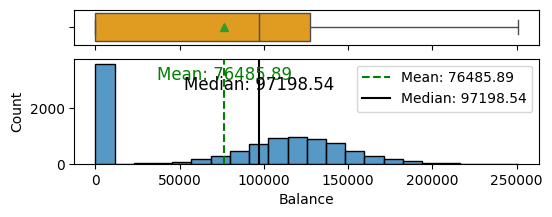

In [ ]:
histogram_boxplot(ds, 'Balance', figsize=(6, 2)) # Histogram_boxplot for Balance

Observations:
- The Mean Customer's Balance is 76,485.89
- Balance is evenly distributed with the exception of a large segment of Customers with 0.00 Balance skewing the histogram.

Recommendations:
- Customers with 0.00 Balance as a result of no longer conducting banking because they exited - should be removed from for proper evaluations of the current Customers with 0.00 Balance to understand contributing factors.

#### Observations on Estimated Salary

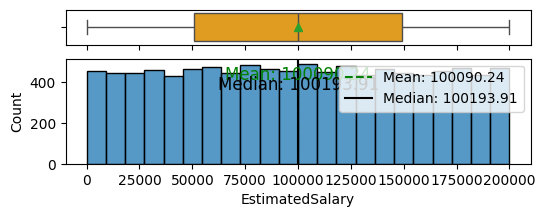

In [ ]:
histogram_boxplot(ds, 'EstimatedSalary', figsize=(6, 2)) # Histogram_boxplot for Estimated Salary

Generation
Silent Generation              NaN
Baby Boomers         102179.128977
Generation X          99831.286157
Millennials          100637.390520
Generation Z          97120.271915
Generation Alpha     114646.789583
Name: EstimatedSalary, dtype: float64


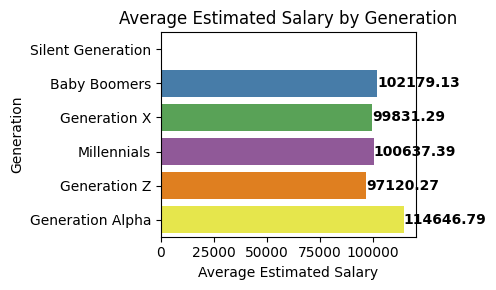

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the age ranges and generation labels
generation_labels = ['Silent Generation', 'Baby Boomers', 'Generation X', 'Millennials', 'Generation Z', 'Generation Alpha']
bins = [0, 11, 27, 43, 59, 78, 96]

# Create a new column for the generations
ds['Generation'] = pd.cut(ds['Age'], bins=bins, labels=generation_labels, right=False)

# Group by Generation and calculate the average EstimatedSalary
generation_salary_avg = ds.groupby('Generation')['EstimatedSalary'].mean()

# Debug: Print average salary for each generation
print(generation_salary_avg)

# Create a horizontal bar plot for the average EstimatedSalary per Generation
plt.figure(figsize=(5, 3))
sns.barplot(x=generation_salary_avg.values, y=generation_salary_avg.index, palette='Set1')

# Add labels and title
plt.xlabel('Average Estimated Salary')
plt.ylabel('Generation')
plt.title("Average Estimated Salary by Generation")

# Add actual salary values on top of the bars
for index, value in enumerate(generation_salary_avg.values):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

Observations:
- Customers average 100k in Salary.
- It is almost the same average Salary for each of the generational groups of Customers.
- Silent Generation has no Salary as expected.

Recommendations:
- Each generational group category averages about the same income and therefore the younger groups should be targeted with loyalty rewards campaigns to protect their longevity as Customers. For example, Gen Zs (age 12-27) with the same Estimated Salary as their older counterparts should be more aggressively targeted with incentives for longer duration investments like CDs, Annuities, 401ks, and Bonds.
- These artfacts produce fewer banking transactions overall, but increase Customer Longevity and should be taken into account as a long term portafolio of bank services.

In [135]:
# Drop the 'Generation' column from both X_train and X_val
ds = ds.drop(columns=['Generation'])  # Drop from your main dataset

#### Observations on Exited

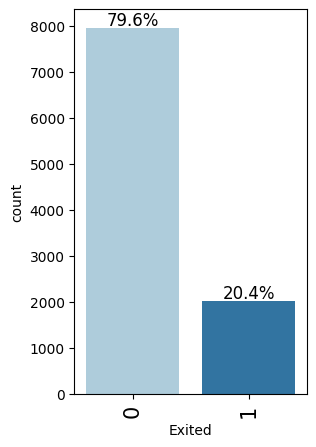

In [ ]:
labeled_barplot(ds, "Exited", perc=True) # Barplot on Exited.

Observations:
- This is our targeted feature.
- We will measure the predicted exits to the actual exits to measure the Customer Risk of Exiting prediction accuracy of the model.
- 20.4% of all Customers leave. That's 1/5th of the entire population. That is NOT acceptable.

Recommendations:
- A comprehensive analysis is required to identify the key factors that contributed to the departure of nearly 2,000 customers.

#### Observations on Geography

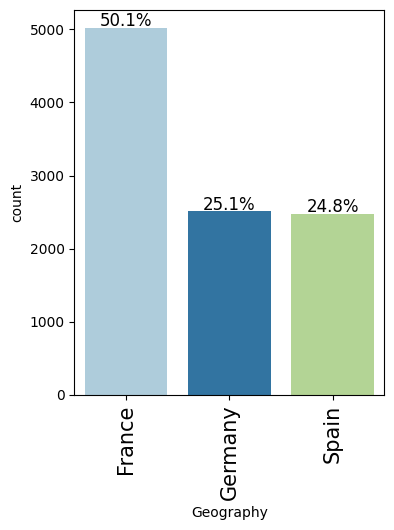

In [ ]:
labeled_barplot(ds, "Geography", perc=True) # Barplot on Geography.

Observations:
- There are mostly 3 European nations that contribute to all Customers.
- Half of all Customers are from France.
- The remaining half are from split evenly between Germany and Spain.

Recommendations:
- Language communications for Customers should reflect their population's distribution of language and culture.
- Additional recommendations for Customers by country are highlighed elsewhere.


#### Observations on Gender

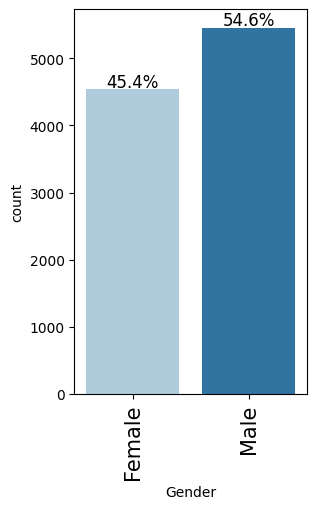

In [ ]:
labeled_barplot(ds, "Gender", perc=True) # Barplot for Gender

Observations:
- There are only about 1,000 more Male Customers than Female.
- Otherwise the distribution by gender is fairly uniform

Recommendations:
- Target for an increase of Female Customers to minimize the gap.

#### Observations on Tenure

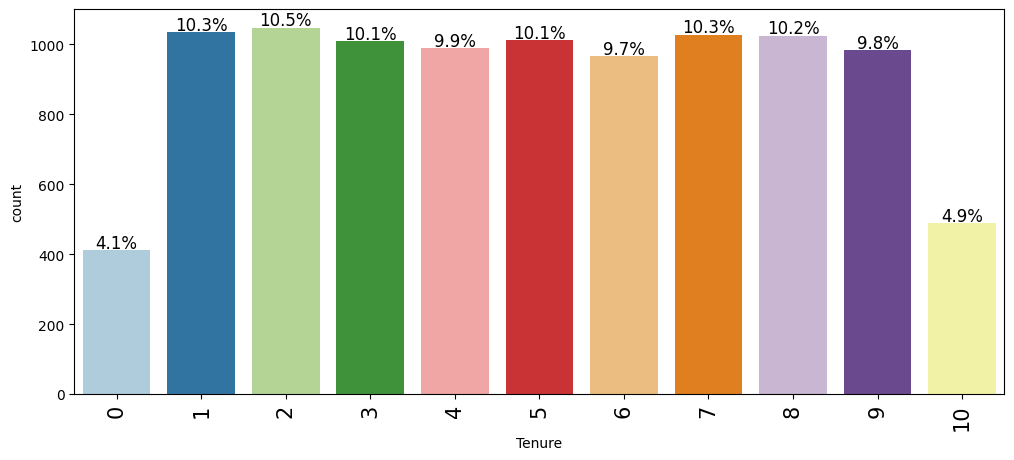

In [ ]:
labeled_barplot(ds, "Tenure", perc=True) # Barplot for Tenure

Observations:
- Previously addressed.

#### Observations on Number of Products

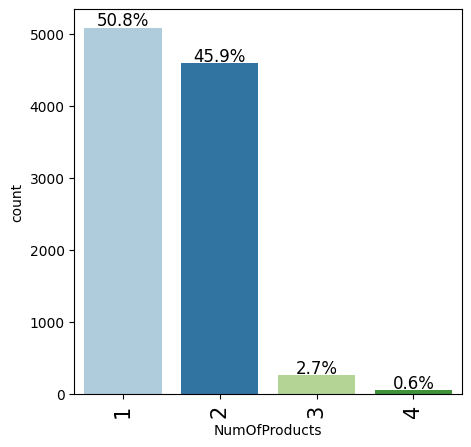

In [ ]:
labeled_barplot(ds, "NumOfProducts", perc=True) # Barplot for Number of products

Observations:
- Previously addressed.

#### Observations on Has Credit Card

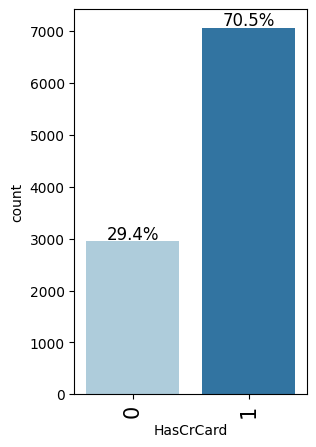

In [ ]:
labeled_barplot(ds, "HasCrCard", perc=True) # Barplot on credit card

Observations:
- 60% of all Customers have a  credit card.
- 30% does not.

Recommendations:
- Customer Loyalty programs for retention should be targeted to those with credit cards.
- Incentives should be designed to target Customers without credit cards.
- Balance Transfer on the bank's credit card should target the almost 3,000 Customers withpout a credit card.

#### Observations on Is Active Member

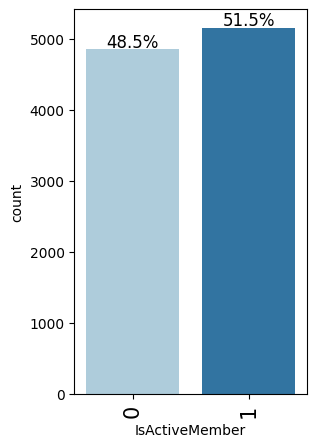

In [ ]:
labeled_barplot(ds, "IsActiveMember", perc=True) # Barplot on Is active member

Observations:
- Active Customers are evenly distributed.

Recommendations:
Establish an alert-trigger treshold for Customer's transactional or login activity.
- Active Customers falling below should be targeted with incentives to increase banking activities.

### Bivariate Analysis - EDA

In [81]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

In [82]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]
# Original List of Columns.

In [83]:
#EXTRA CREDIT
cols_list = ["CreditScore","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Exited"] # All Numerical columns (Gender and Geography are Object datatype)

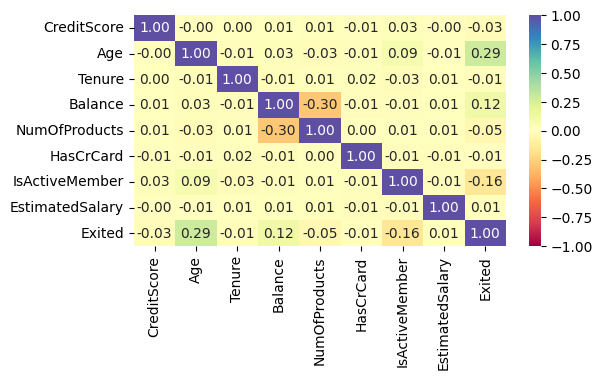

In [84]:
plt.figure(figsize=(6, 3))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:
* The strongest correlations with Exited are: Age and Balance

Recommendations:
- Further analysis to determine distributions of Exited Customers by Age and by Balance.  

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


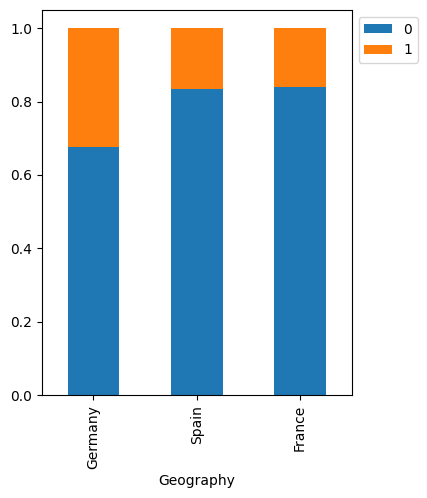

In [ ]:
stacked_barplot(ds, "Geography", "Exited" )

Observations:

- Distribution by Customer's country is higher for those from Germany.
- For Spain and France (France is twice as lasrge as Spain and Germany), the number of Customers that leave is higher than for those that stay.

Recommendations:
- Contributing factors for the higher departure of Custmers from Germany needs further investigations.

#### Exited Vs Gender

Gender  Female  Male    All
Exited                     
All       4543  5457  10000
0         3404  4559   7963
1         1139   898   2037
------------------------------------------------------------------------------------------------------------------------


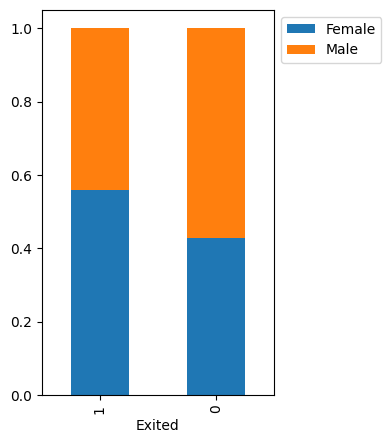

In [ ]:
stacked_barplot(ds, "Exited","Gender" )

Observations:

- Distribution of Gender of Customers is higher for Females and those that leave.

#### Exited Vs Has Credit Card

HasCrCard     0     1    All
Exited                      
All        2945  7055  10000
0          2332  5631   7963
1           613  1424   2037
------------------------------------------------------------------------------------------------------------------------


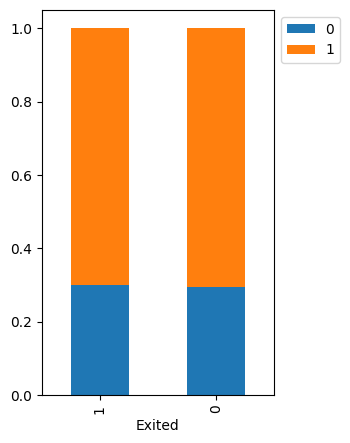

In [ ]:
stacked_barplot(ds, "Exited","HasCrCard" )

Observations:

- Distribution of Customers with credit cards are about the same for those that stay and those that leave.

#### Exited Vs Is active member

IsActiveMember     0     1    All
Exited                           
All             4849  5151  10000
0               3547  4416   7963
1               1302   735   2037
------------------------------------------------------------------------------------------------------------------------


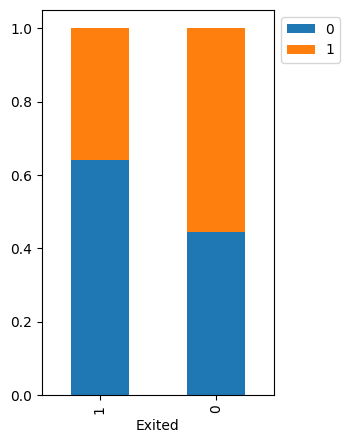

In [ ]:
stacked_barplot(ds, "Exited","IsActiveMember" )

#### Exited Vs Credit Score

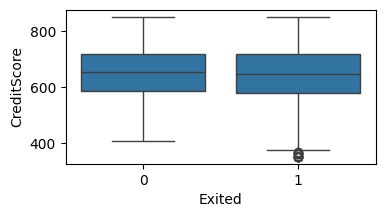

In [ ]:
plt.figure(figsize=(4,2))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

Observations:

- Distribution of Credit Score of Customers and the average are about the same for those that stay and those that leave.
- There's a number of Outliers for those that leave.

#### Exited Vs Age
This Age feature had one of the two strongest correlation with Exiting Customers:

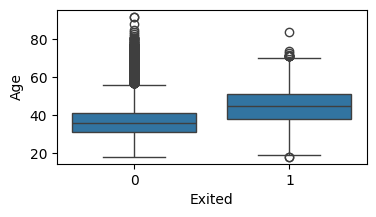

In [ ]:
plt.figure(figsize=(4,2))
sns.boxplot(y='Age',x='Exited',data=ds)
plt.show()

Observations:
- The average Customer Age that left the bank is between 40-50.

Recommendations:
- Investigate contributing factors.

#### Exited Vs Tenure

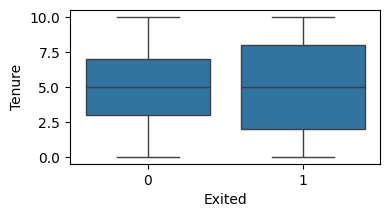

In [ ]:
plt.figure(figsize=(4,2))
sns.boxplot(y='Tenure',x='Exited',data=ds) # Boxplot for Exited and Tenure
plt.show()

Observations:

- The average are about the same for those that stay and those that live.
- However, the distribution is wider for those Customers that leave.

#### Exited Vs Balance
This Balance feature had one of the two strongest correlation with Exiting Customers after Age:

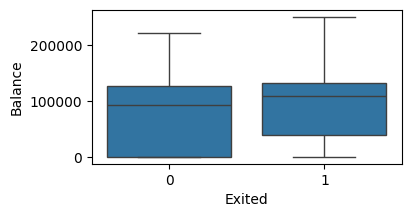

In [ ]:
plt.figure(figsize=(4,2))
sns.boxplot(y='Balance',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Balance
plt.show()

Observations:
- The Balance between those that exited and those that remained with the bank are statistically insignificant but yet was shown to represent the secong largest corrrelation with Exiting Customers.

Recommendations:
- Further analysis is required here.

#### Exited Vs Number of Products

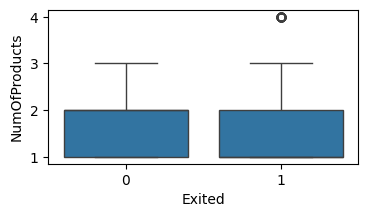

In [ ]:
plt.figure(figsize=(4,2))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Number of products
plt.show()

Observations:

- Distribution of Number of Products used by Customers are about the same for those that stay and those that leave.

#### Exited Vs Estimated Salary

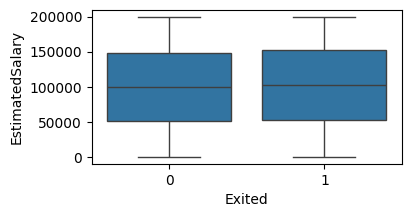

In [ ]:
plt.figure(figsize=(4,2))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Estimated Salary
plt.show()

Observations:

- Distribution of Estimated Salary of Customers and the average are about the same for those that stay and those that live.

## <font size=5 color='#ADD8E6'>Data Preprocessing --------------------------------------------------------------- Section</font>

### Categorical Encoding with Dummy Variable Creation - Data Preprocessing

In [137]:
# Identifying all categorical columns.
	# •	Convert them to (one-hot encoded) columns.
	# •	Dropping the first category from each categorical variable to avoid multicollinearity.
	# •	Encoded columns are of type float.
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True,dtype=float)
print("Categorical Encoding done where needed (object datatypes).")

Categorical Encoding done where needed (object datatypes).


### Train | Validation | Test (Splits) - Data Preprocessing

Separate features from results columns into two tables for handling prediction training and testing datasets:

In [138]:
X = ds.drop(['Exited'],axis=1) # Remove Exited column from Credit Score through Estimated Salary on X table.
y = ds['Exited'] # Assign our Target feature Exited to y table.

In [139]:
print("Features Table or X_large = ", X.shape, "\nResults Table or y_large = ", y.shape) # Confirm features table versus results table.

Features Table or X_large =  (10000, 11) 
Results Table or y_large =  (10000,)


1st Split - Temporary X_large dataset (for Train/Validation datasets)the  and he Test dataset Split:



In [140]:
# Splitting the entire dataset into the Training and Testing data sets.
# The Test data set is not used until the end of the process to evaluate the final performance of the model on completely unseen data.
X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42,stratify=y,shuffle = True)

This will leave 20% of the available data for the Test dataset and 80% of the data for the train and validation  data sets combined.

* The full allocation is 80% of the data (64% of the original data) for training, and 20% of the 80% data (16% of the original data) for validation.


In [141]:
print("\nTrain/Validation features data (X_large) = ",X_large.shape, "with corresponding Results (y_large) = ",y_large.shape,"\nTest features data (x_test) = ", X_test.shape, "with corresponding Test results data",y_test.shape) # Check splits allocations.


Train/Validation features data (X_large) =  (8000, 11) with corresponding Results (y_large) =  (8000,) 
Test features data (x_test) =  (2000, 11) with corresponding Test results data (2000,)


2nd Split - Temporary X_large dataset split into Train and Validation datasets:

In [142]:
# Splitting the temporaty X_large dataset into the Training and Validation data sets.
X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.20, random_state = 42,stratify=y_large, shuffle = True) # The validation set is used during the training process to fine-tune model parameters and to avoid overfitting. It helps to evaluate how well the model is generalizing *without* touching the test set.

In [143]:
# After split checks.
print("\nTrain/Validation features data (X_large) = ",X_large.shape, "with corresponding Results (y_large) = ",y_large.shape)
print("Above was split as follows:")
print("\nTraining features data (X_train) = ", X_train.shape, "with corresponding Results (y_large) = ",y_train.shape,"\nValidation features data (X_val) = ", X_val.shape, "with corresponding Validation Results (y_val) = ",y_val.shape)
print("\n - - - - - - - - Test dataset will be used to verify training model on unseen data (X_test) = ", X_test.shape)


Train/Validation features data (X_large) =  (8000, 11) with corresponding Results (y_large) =  (8000,)
Above was split as follows:

Training features data (X_train) =  (6400, 11) with corresponding Results (y_large) =  (6400,) 
Validation features data (X_val) =  (1600, 11) with corresponding Validation Results (y_val) =  (1600,)

 - - - - - - - - Test dataset will be used to verify training model on unseen data (X_test) =  (2000, 11)


In [144]:
# EXTRA CREDIT (Visualize Splits)
# Check the shapes of the training, validation, and test sets adjacent to each other with colored text
print("\nX_Large =", X_large.shape,"is further split into training and validation. Presented here for easier visualizations:")
print(f"\033[33mTrain set shape: {X_train.shape}\033[0m", end=' | ')  # Orange color for train
print(f"\033[32mValidation set shape: {X_val.shape}\033[0m", end=' | ')  # Green color for validation
print(f"\033[35mTest set shape: {X_test.shape}\033[0m")  # Violet color for test

print("\n")
print(f"1. Original set shape: {X.shape}")
print("|" * 100)  # Print a line separator.
# X is your feature data, and y is your target data


# First split: Splits data into 80% training+validation (X_large, y_large) and 20% test (X_test, y_test)
print("\n\n2. First split: Splits the data into 80% \033[1;4mtemporay (temp)\033[0m (X_large, y_large) and \033[35m20% test (X_test, y_test).\033[0m")
print("|" * 80, "\033[35m|\033[0m" * 20)  # Line separator to show split visually
print(f"Temporary (temp) set shape: {X_large.shape}")
print(f"\033[35mTest set shape: {X_test.shape}\033[0m\n")

# Second split: Subsplit X_large and y_large into 80% training and 20% validation
print("\n3. Second split: Subsplits the (temp) dataset into the \033[1;4mtraining (64% of total) + validation set (16% of total),\033[0m \nor (X_Large, y_large) = (X_train, y_train) + (X_val, y_val).")
print("\033[1;33mt\033[0m" * 64, "\033[1;32mv\033[0m" * 16, "\033[1;35mT\033[0m" * 20)  # Line separator with t for training and v for validation
print(f"\033[1;33mTraining set shape (t): {X_train.shape}\033[0m") # Training set
print(f"\033[1;32mValidation set shape (v): {X_val.shape}\033[0m") # Validation set
print(f"\033[35mTest set shape (T): {X_test.shape}\033[0m") # Test set


X_Large = (8000, 11) is further split into training and validation. Presented here for easier visualizations:
Train set shape: (6400, 11) | Validation set shape: (1600, 11) | Test set shape: (2000, 11)


1. Original set shape: (10000, 11)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


2. First split: Splits the data into 80% temporay (temp) (X_large, y_large) and 20% test (X_test, y_test).
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| ||||||||||||||||||||
Temporary (temp) set shape: (8000, 11)
Test set shape: (2000, 11)


3. Second split: Subsplits the (temp) dataset into the training (64% of total) + validation set (16% of total), 
or (X_Large, y_large) = (X_train, y_train) + (X_val, y_val).
tttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttt vvvvvvvvvvvvvvvv TTTTTTTTTTTTTTTTTTTT
Training set shape (t): (6400, 11)
Validation set shape (v): (1600, 11)
Test set shape (T): (2000, 11)


### Data Normalization - Data Preprocessing

Since all the numerical values are on a different scale, we will scale them. To normalize them to the same scale:

In [145]:
# Define cols_list as all columns except 'Exited'
#cols_list = [col for col in X_train.columns if col != 'Exited']  # Replace X_train with your feature dataframe name if different
cols_list = [col for col in cols_list if col != 'Exited'] # Target Variable separated from the the feature variables.

# creating an instance of the standard scaler
sc = StandardScaler()

# Apply scaling to the specified columns
X_train[cols_list] = sc.fit_transform(X_train[cols_list])  # Scaling for training set
X_val[cols_list] = sc.transform(X_val[cols_list])          # Scaling for validation set
X_test[cols_list] = sc.transform(X_test[cols_list])        # Scaling for test set

Why using **StandardScaler()** is important, specially with Neural Networks:

1. Feature Scaling:
Many machine learning algorithms assume that the features in the dataset are centered around 0 and have similar scales. If the features vary widely in terms of scale (e.g., one feature is measured in dollars while another is measured in grams), it can cause the model to perform poorly because larger scaled features **may dominate the learning process**. StandardScaler standardizes features by subtracting the mean and dividing by the standard deviation.
2.	Avoid Bias Toward Larger-Scaled Features:
Without scaling, features with larger numerical values **will have a greater effect on the model’s behavior**, even if they aren’t inherently more important. For example, a feature with values in the thousands will dominate over a feature with values in the range of 1 to 10.
3.	Improved Model Convergence:
Many optimization algorithms, **like gradient descent, work faster and converge more efficiently** when the data is scaled. If the features are on different scales, the optimization process can take longer and be less effective.
4.	Neural Networks:
In neural networks, scaling input features is particularly important because <font color =orange>`it ensures that gradients flow more smoothly`</font> through the network, preventing issues like vanishing or exploding gradients.

## <font size=5 color='#ADD8E6'>Model Building ---------------------------------------------------------------------- Section</font>

### Model Evaluation Rationale - <font size=3 color='#ADD8E6'>Model Building</font>

Logic for choosing the metric that would be the best metric for this business scenario.

- Observations from available dataset: Within the last 6 months a 1/4 of all customers left resulting in a significant permanent loss of future revenue.
- Our target is to predict which customers are likely to abandon bank services to preempt and avoid their departure well in advance.
- The worst situation is predicting no departure and yet, customer does exit. **False Negative**
- Our NN model should be capable of predicting customers exiting matching actual exiting as accurtely as possible. False Negatives should get as small as possible.
- Therefore **Recall** = TP/ (TP+FN) is our best measure.
- We will monitor for the highest Recall value (smallest False Positives)


**Let's create a function for plotting the confusion matrix**



In [146]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [147]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer - <font size=3 color='#ADD8E6'>Model Building</font>
 Stochastic Gradient Descent keras optimizer:

- PROs
 - Faster for large datasets.
 - Requires computing gradients and weight calculations for the entire data.
 - Because its stochastic nature, SGD can escape local minima and potentially find better solutions.

- CONs
 - Nosy Updates making it less stable leading to oscillations.
 - Requires Tuning of learning rates and other hyperparameters.
 - Slower Convergance compared to Adam (Adaptive)

In [148]:
backend.clear_session() # Clear any previous models or computational graphs in memory
print("Previous models or computational graphs in memory have been cleared.")

# By setting a “seed,” we control the random number generators so that they produce the same random numbers every time.
print("\nNow, we set the seed for NumPy, Python, and TensorFlow random generators ...\n")

np.random.seed(2) # Fixes the seed for NumPy’s random number generator.
random.seed(2) # Fixes the seed for Python’s built-in random number generator.
tf.random.set_seed(2) # Fixes the seed for TensorFlow’s random number generator.
print("Why? Because some parts of machine learning (like initializing weights or shuffling data) involve randomness.")
print("We need to produce the same random numbers every time producing consisten results for testing machine learning models.")

Previous models or computational graphs in memory have been cleared.

Now, we set the seed for NumPy, Python, and TensorFlow random generators ...

Why? Because some parts of machine learning (like initializing weights or shuffling data) involve randomness.
We need to produce the same random numbers every time producing consisten results for testing machine learning models.


In [149]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_0.add(Dense(32, activation='relu'))
# Complete the code to add the output layer with the number of neurons required.
model_0.add(Dense(1, activation = 'sigmoid'))

print("Neural Network initialized...\n")
print("Hidden Layer: 32 neurons with the ReLU activation function.")
print("Output Layer: 1 neuron with the sigmoid activation function.")
print("Note: For binary classification tasks, using a single neuron with the sigmoid function is common because it outputs probabilities between 0 and 1.\n")

Neural Network initialized...

Hidden Layer: 32 neurons with the ReLU activation function.
Output Layer: 1 neuron with the sigmoid activation function.
Note: For binary classification tasks, using a single neuron with the sigmoid function is common because it outputs probabilities between 0 and 1.



In [150]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001) # SGD(learning_rate=0.001)SGD:
# This is the stochastic gradient descent optimizer, which controls the step size for each iteration during the optimization process.
print("\nStochastic Gradient Descent optimizer (SDG) set up. \nIt controls step size for each iteration during optimization process.\n")
# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()
print("Recall metric setup.\n")


Stochastic Gradient Descent optimizer (SDG) set up. 
It controls step size for each iteration during optimization process.

Recall metric setup.



In [151]:
# Binary cross entropy as loss function and Recall metric setup.
model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[keras.metrics.Recall()])
print("\nloss = 'binary_crossentropy'setup: This is the appropriate loss function for binary classification tasks, measuring the difference between the Predicted and Actual values.\n")
print("metrics = [keras.metrics.Recall()] setup: This specifies that recall will be used as a metric to evaluate the model’s performance during training and testing.\n")


loss = 'binary_crossentropy'setup: This is the appropriate loss function for binary classification tasks, measuring the difference between the Predicted and Actual values.

metrics = [keras.metrics.Recall()] setup: This specifies that recall will be used as a metric to evaluate the model’s performance during training and testing.



In [152]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

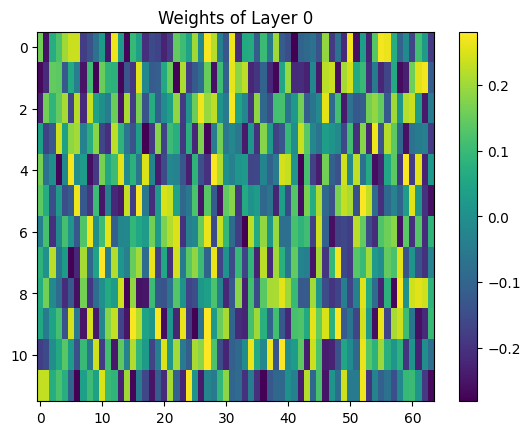

In [100]:
# Visualize weights from the first layer
import matplotlib.pyplot as plt

weights = model_0.layers[0].get_weights()[0]
plt.imshow(weights, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Weights of Layer {}'.format(0))
plt.show()

In [ ]:
# List weights and biases of the first layer
weights_layer_0 = model_0.layers[0].get_weights()
print(weights_layer_0[0])  # Weights
print(weights_layer_0[1])  # Biases

[[ 1.75325200e-01 -2.61551142e-01  5.55486642e-02  1.14529379e-01
   2.23805144e-01  2.67600328e-01  2.32992500e-01 -1.18666239e-01
  -1.29189283e-01 -7.48853087e-02  1.58950016e-02 -2.20118091e-01
   2.73295999e-01  6.38830811e-02 -2.60986596e-01  9.30325985e-02
   4.30375934e-02 -1.56150654e-01 -1.29977688e-01 -1.46740317e-01
  -2.03299910e-01 -1.45411894e-01  1.81421742e-01  9.27374363e-02
   4.78739664e-02  2.10710168e-01 -3.00635584e-03  2.97922760e-01
   2.26749063e-01 -3.96726131e-02 -1.44787222e-01  2.82083094e-01
  -2.16455773e-01  6.40020296e-02  6.17788211e-02 -1.15042366e-01
   1.19284868e-01 -2.07410809e-02  2.04781219e-01 -1.22410670e-01
  -1.50430277e-01 -2.49734640e-01 -1.02991961e-01 -8.97317827e-02
  -7.60480911e-02 -1.61512405e-01  1.81536809e-01 -1.85490489e-01
  -7.43354186e-02 -1.79495990e-01  2.75027603e-01 -2.56038934e-01
   4.68956940e-02 -2.19024733e-01  1.38982072e-01  2.61363775e-01
   2.48185068e-01  5.94121180e-02 -8.73972476e-02 -1.44774411e-02
  -1.73507

In [153]:
# Datasets
print("\nX_Large =", X_large.shape,"is further split into training and validation. Presented here for easier visualizations:")
print(f"\033[33mTrain set shape: {X_train.shape}\033[0m", end=' | ')  # Orange color for train
print(f"\033[32mValidation set shape: {X_val.shape}\033[0m", end=' | ')  # Green color for validation
print(f"\033[35mTest set shape: {X_test.shape}\033[0m")  # Violet color for test

# Objectives
print("_" * 100)
print(f"Main Objectives: As the model trains over more epochs ...")
print(f"We look for a LOSS decrease \u25BC and a RECALL increase \u25B2 for training and also validation sets:")
print("  • Training Loss and Validation Loss: How the loss changes over time.")
print("-" * 100)
print("\nBatch Size: We will set to 16, 32, 64, or 128.")
print("A smaller batch size can provide more updates to the NN model weights during training but may take longer,")
print("while a larger batch size may speed up training but provide fewer updates.")
print("\nEpochs: The number of epochs should depend on your specific dataset and NN model.")
print("We will start with values 10, 50, or 100, and monitor the training and validation loss/metrics")
print("to see when the NN model converges or starts to overfit.")
print("  • Recall and Validation Recall: How the ability of the model to detect true positives changes during training.\n")


X_Large = (8000, 11) is further split into training and validation. Presented here for easier visualizations:
Train set shape: (6400, 11) | Validation set shape: (1600, 11) | Test set shape: (2000, 11)
____________________________________________________________________________________________________
Main Objectives: As the model trains over more epochs ...
We look for a LOSS decrease ▼ and a RECALL increase ▲ for training and also validation sets:
  • Training Loss and Validation Loss: How the loss changes over time.
----------------------------------------------------------------------------------------------------

Batch Size: We will set to 16, 32, 64, or 128.
A smaller batch size can provide more updates to the NN model weights during training but may take longer,
while a larger batch size may speed up training but provide fewer updates.

Epochs: The number of epochs should depend on your specific dataset and NN model.
We will start with values 10, 50, or 100, and monitor the tr

In [158]:
print(X_train.dtypes) # Check for datatypes ro ensure no Object/Category remaain unprocessed.
print(y_train.dtypes) # Check for datatypes ro ensure no Object/Category remaain unprocessed.

CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard            float64
IsActiveMember       float64
EstimatedSalary      float64
Geography_Germany    float64
Geography_Spain      float64
Gender_Male          float64
dtype: object
int64


In [159]:
# Forward Propagation Illustration - Utility Function

import time
import sys

# ANSI color codes
RED = "\033[31m"
GREEN = "\033[32m"
ORANGE = "\033[33m"
RESET = "\033[0m"

# Forward Propagation Illustration
print("\nIllustration of -Forward Propagation- by Activation Functions at each neuron based on the strenght of importance or weights between nodes.")

# Function to animate dashes with color choice, moving towards a fixed [*] position, and stop after a timeout
def animate_dashes_with_fixed_asterisk(total_time=10, speed=0.1, color="RED"):
    # Choose color based on user input
    if color == "RED":
        dash_color = RED
    elif color == "GREEN":
        dash_color = GREEN
    elif color == "ORANGE":
        dash_color = ORANGE
    else:
        dash_color = RESET  # Default to no color if an invalid option is given

    width = 10  # Initial width of dashes
    fixed_pos = 45  # Fixed position for the asterisk [*]
    start_time = time.time()  # Record the starting time

    while time.time() - start_time < total_time:
        # Calculate remaining space before the asterisk [*]
        remaining_space = fixed_pos - width - 3  # 3 accounts for the length of [*]

        if remaining_space < 0:
            remaining_space = 0  # Stop growing dashes once they reach [*]

        # Use carriage return '\r' to return to the start of the line and overwrite the previous output
        sys.stdout.write(f"\r{GREEN}[* neuron layer_i *] {dash_color}{'-' * width}{' ' * remaining_space}{ORANGE}[* neuron layer_i+1 *]{RESET}")
        sys.stdout.flush()  # Force output to appear immediately
        time.sleep(speed)   # Control the speed of the animation

        if remaining_space == 0:
            width = 10  # Reset width after dashes meet [*] to restart animation
        else:
            width += 1  # Increase the number of dashes for movement effect

    # After the timeout ends, clear the line and stop
    sys.stdout.write("\r" + " " * (fixed_pos + 3) + "\r")
    sys.stdout.flush()

# Run the animation (set timeout in seconds and specify color: "RED", "GREEN", or "ORANGE")
animate_dashes_with_fixed_asterisk(total_time=10, speed=0.08, color="GREEN")

# Leave the illustration completed without animation
print(f"\r{GREEN}[* neuron layer_i *]{GREEN} ----------------------------------------- {ORANGE}[* neuron layer_i+1 *]")


Illustration of -Forward Propagation- by Activation Functions at each neuron based on the strenght of importance or weights between nodes.
[* neuron layer_i *] ----------------------------------------- [* neuron layer_i+1 *]


Now, drum roll please ...

In [155]:
# Fitting the Artificial Neural Network (ANN) Model: ORIGINAL
print("\nFitting the Artificial Neural Network (ANN) Model: SGD - our baseline ...\n")
history_0 = model_0.fit(
    X_train, y_train, # Train model on the training dataset
    batch_size=32,    # Specify the batch size to 32
    validation_data=(X_val, y_val), # Use validation dataset for evaluation of this training model. <------ Monitor
    epochs=50,    # Specify the number of epochs to 50. The model will be trained this total cycles.
    verbose=1
)


Fitting the Artificial Neural Network (ANN) Model: SGD - our baseline ...

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6602 - recall_1: 0.3081 - val_loss: 0.6005 - val_recall_1: 0.0583
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5963 - recall_1: 0.0376 - val_loss: 0.5584 - val_recall_1: 0.0061
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5575 - recall_1: 0.0000e+00 - val_loss: 0.5325 - val_recall_1: 0.0000e+00
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5332 - recall_1: 0.0000e+00 - val_loss: 0.5160 - val_recall_1: 0.0000e+00
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5174 - recall_1: 0.0000e+00 - val_loss: 0.5050 - val_recall_1: 0.0000e+00
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5065 - recall_1: 0.0000e+00 - val_loss: 0.4972 - val_recall_1: 0.0000e+00
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4986 - recall_1: 0.0000e+00 - val_loss: 0.4914 - val_recall_1:

**Observe weights**

In [156]:
# Use Keras callbacks to monitor the training process and visualize weights and gradients at different epochs, which may help identify weights contributing to errors during training.
class WeightsLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        for layer in self.model.layers:
            if hasattr(layer, 'kernel'):
                weights = layer.get_weights()[0]
                # Log weights or visualize here
                print(f' Layer {layer.name} weights: {weights}')

model_0.fit(X_train, y_train, callbacks=[WeightsLogger()])

162/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4180 - recall_1: 0.2117 Layer dense weights: [[ 0.1698001  -0.25886297  0.05786121  0.11512227  0.2185205   0.26015487
   0.23013912 -0.13763925 -0.13422856 -0.0735462   0.02299409 -0.2315455
   0.27705607  0.05143552 -0.26549038  0.09346051  0.04050122 -0.17588831
  -0.1400347  -0.14817609 -0.2118244  -0.16145441  0.16697414  0.09685919
   0.04901797  0.21092239 -0.0053688   0.29612353  0.23606798 -0.0383767
  -0.14017221  0.2832754  -0.21365534  0.06505312  0.06147418 -0.11140762
   0.1182932  -0.0288341   0.2021804  -0.117778   -0.15327527 -0.2606982
  -0.10170047 -0.08935267 -0.08486737 -0.15560734  0.18666686 -0.19296993
  -0.07010784 -0.19054925  0.27651107 -0.25636235  0.04391531 -0.21905623
   0.12776063  0.26278168  0.25719118  0.06097    -0.08899504 -0.01598633
  -0.17294253  0.11381213  0.02197479 -0.15324774]
 [-0.2724054  -0.20001796  0.16159725  0.14414361 -0.15217759  0.03910734
  -0.0287217  -0.36214456  0.09846065 -0.2

In [157]:
print("\nModel Training Complete")
print("-" * 100)
print("For each subsequent epoch, these values get updated:")
print("•	Training Loss and Validation Loss: How the loss changes over time.")
print("•	Training Recall and Validation Recall: How the ability of the model to detect true positives changes during training.")
print("-" * 100)


Model Training Complete
----------------------------------------------------------------------------------------------------
For each subsequent epoch, these values get updated:
•	Training Loss and Validation Loss: How the loss changes over time.
•	Training Recall and Validation Recall: How the ability of the model to detect true positives changes during training.
----------------------------------------------------------------------------------------------------


**History Keys in Keras Metrics**

In [160]:
print(history_0.history.keys()) # Available keys in the history object:

dict_keys(['loss', 'recall_1', 'val_loss', 'val_recall_1'])


**Loss function**

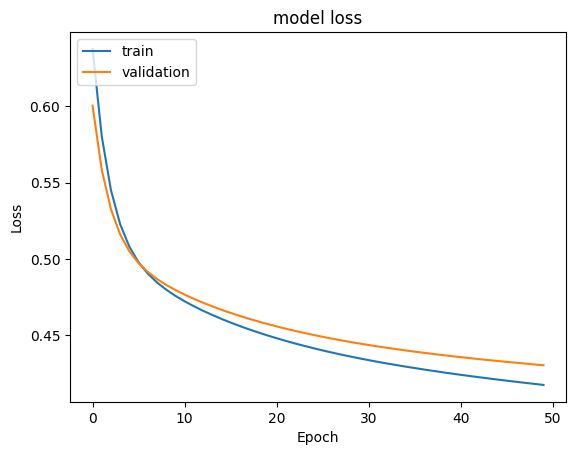

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('Model Loss with SGD Optimizer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall** ... yay!

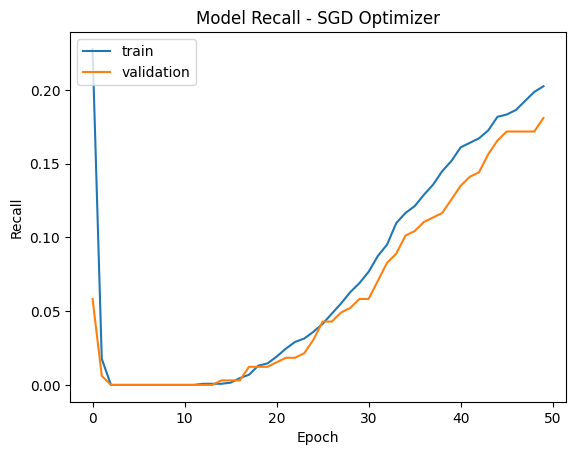

In [161]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall_1'])
plt.plot(history_0.history['val_recall_1'])
plt.title('Model Recall - SGD Optimizer')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [162]:
# Predicting the results using best as a threshold

y_train_pred = model_0.predict(X_train) # This line uses the trained model model_0 to make predictions on the training data (X_train).
# The predict function outputs a probability score for each sample, typically between 0 and 1,
# since the output layer has a sigmoid activation function (which outputs a probability for binary classification).

# Activation Thresholding for Output layer
y_train_pred = (y_train_pred > 0.5) # Since the model’s predictions are probabilities, this line converts the probabilities into binary classifications.
# If the probability is greater than 0.5, it is classified as True (1), otherwise, it is classified as False (0). Sigmoid

y_train_pred # After thresholding, y_train_pred will contain a series of True and False values that correspond to the model’s classification of each instance in the training set (X_train).

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [163]:
print("\nmodel_0.predict(X_train) gives you a probability score for each training sample.")
print(" • (y_train_pred > 0.5) converts these probabilities into binary predictions using a threshold of 0.5,")
print("    where values greater than 0.5 are classified as True (or 1) and those less than or equal to 0.5 as False (or 0).")


model_0.predict(X_train) gives you a probability score for each training sample.
 • (y_train_pred > 0.5) converts these probabilities into binary predictions using a threshold of 0.5,
    where values greater than 0.5 are classified as True (or 1) and those less than or equal to 0.5 as False (or 0).


In [ ]:
# Predicting on the validation set
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

# Now you can store the recall scores
train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
model_name = "Neutral Network with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [ ]:
# Classification report
print(f"\033[33mClassification report for the training set:\n")
cr = classification_report(y_train, y_train_pred)
print(cr)

Classification report for the training set:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5096
           1       0.77      0.46      0.58      1304

    accuracy                           0.86      6400
   macro avg       0.82      0.71      0.75      6400
weighted avg       0.85      0.86      0.85      6400



In [ ]:
# Classification report
print(f"\033[32mClassification report for the validation set:\n")
cr = classification_report(y_val, y_val_pred)
print(cr)

Classification report for the validation set:

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1274
           1       0.52      0.70      0.60       326

    accuracy                           0.81      1600
   macro avg       0.72      0.77      0.73      1600
weighted avg       0.83      0.81      0.82      1600



**Confusion matrix**

Training Confusion Matrix Predictions with the 6,400 (Training) dataset:



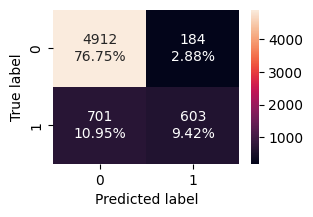

In [ ]:
print(f"\033[33mTraining Confusion Matrix Predictions with the 6,400 (Training) dataset:\033[0m\n")
make_confusion_matrix(y_train, y_train_pred)

Validation Confusion Matrix Predictions with the 1,600 (Validation) dataset:



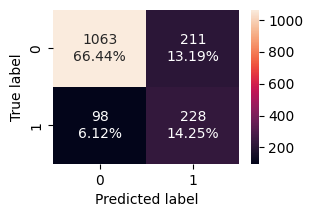

In [ ]:
print(f"\033[32mValidation Confusion Matrix Predictions with the 1,600 (Validation) dataset:\033[0m\n")
make_confusion_matrix(y_val, y_val_pred)

In [ ]:
result_df = train_metric_df - valid_metric_df # Calculates the Recall difference between the training and the validation.
print(result_df.head(1))  # Displays the first row
# Display just the last value in the first row as percentage
last_value_first_row = result_df.iloc[0, -1]  # Using iloc to access the first row and last column
print(f"\033[34m\nDelta between Training and Validation Recall values is: {last_value_first_row * 100:.2f}%\033[0m")  # Prints the value in the last cell of the first row

                            recall
Neutral Network with SGD  0.034509

Delta between Training and Validation Recall values is: 3.45%


In [170]:
# Back Propagation Illustration - Utility Function

import time
import sys

# ANSI color codes
RED = "\033[31m"
GREEN = "\033[32m"
ORANGE = "\033[33m"
RESET = "\033[0m"

print("\nIllustration of -Back Propagation- to nodes with stronger influence after wights are updated with a keras Optimizer")

# Function to animate dashes moving from right to left, with "updated weight" in the middle
def animate_dashes_with_weight_in_middle(total_time=10, speed=0.1, asterisk_color="GREEN", dash_color="RED"):
    # Choose dash color based on user input
    if dash_color == "RED":
        dash_color = RED
    elif dash_color == "GREEN":
        dash_color = GREEN
    elif dash_color == "ORANGE":
        dash_color = ORANGE
    else:
        dash_color = RESET  # Default to no color if an invalid option is given

    # Choose asterisk color
    if asterisk_color == "RED":
        asterisk_color = RED
    elif asterisk_color == "GREEN":
        asterisk_color = GREEN
    elif asterisk_color == "ORANGE":
        asterisk_color = ORANGE
    else:
        asterisk_color = RESET  # Default to no color if an invalid option is given

    dash_width = 46  # Starting width of the dashes
    fixed_pos = 46  # Position where the asterisk [*] will stay fixed
    word = " updated weight "
    word_length = len(word)
    start_time = time.time()  # Record the starting time

    while time.time() - start_time < total_time:
        # Calculate the remaining space for the dashes
        remaining_space = fixed_pos - dash_width - 3  # 3 accounts for the length of [*]

        # Calculate the position to place the word in the middle
        total_length = dash_width + len(word) + 3  # Total length including dashes and word
        word_position = (total_length // 2) - (word_length // 2)  # Center the word

        # Create the dashes string
        dashes = '-' * dash_width

        # Insert the word into the dashes at the calculated position
        if word_position < dash_width:
            dashes = dashes[:word_position] + word + dashes[word_position + word_length:]

        # Print the line with dashes shrinking toward the asterisk [*]
        sys.stdout.write(f"\r{asterisk_color}[* neuron layer_i *] {dash_color}{dashes}{' ' * remaining_space}{RESET}")
        sys.stdout.flush()  # Force the output to appear immediately
        time.sleep(speed)   # Control the speed of the animation

        if dash_width == 0:
            dash_width = 45  # Reset dash width after dashes shrink to 0
        else:
            dash_width -= 1  # Decrease the number of dashes for the leftward effect

    # After timeout ends, clear the line and stop
    sys.stdout.write("\r" + " " * (fixed_pos + 3) + "\r")
    sys.stdout.flush()

# Run the animation (set timeout in seconds and specify colors)
animate_dashes_with_weight_in_middle(total_time=10, speed=0.08, asterisk_color="GREEN", dash_color="RED")

# Leave the illustration completed without animation
print(f"\r{GREEN}[* neuron layer_i *]{RED} <---------------------------------------- {ORANGE}[* neuron layer_i+1 *]")


Illustration of -Back Propagation- to nodes with stronger influence after wights are updated with a keras Optimizer
[* neuron layer_i *] <---------------------------------------- [* neuron layer_i+1 *]


In [171]:
message = "Essentially:\nHow fast the global minimum is found (by Error Loss) is a function of the chosen Keras optimizers \n" \
          "during the backflow propagation with updated weights and strengths of signals between neurons."

# Run the animation (set timeout in seconds and specify color: "RED", "GREEN", or "ORANGE")
animate_dashes_with_fixed_asterisk(total_time=5, speed=0.08, color="GREEN")
print(f"\r{GREEN}[* neuron layer_i *]{GREEN} ----------------------------------------- {ORANGE}[* neuron layer_i+1 *]")

# Run the animation (set timeout in seconds and specify colors)
animate_dashes_with_weight_in_middle(total_time=5, speed=0.08, asterisk_color="GREEN", dash_color="RED")
print(f"\r{GREEN}[* neuron later_i *]{RED} <---------------------------------------- {ORANGE}[* neuron layer_i+1 *]{RESET}")

print(message)

[* neuron layer_i *] ----------------------------------------- [* neuron layer_i+1 *]
[* neuron later_i *] <---------------------------------------- [* neuron layer_i+1 *]
Essentially:
How fast the global minimum is found (by Error Loss) is a function of the chosen Keras optimizers 
during the backflow propagation with updated weights and strengths of signals between neurons.


## <font size=5 color='#ADD8E6'>Model Performance Improvement -------------------------------------- Section</font>

**This is where the computational resources versus the prediction efficiency get tweaked for fun and profit ;-) ...**

Models Optimization Overview:

<table>

 <tr><th>#</th><th>Model</th><th>Optimizer</th><th>Regularization</th><th>Batch Normalization</th></tr>

 <tr><td>1<td>NN<td>Adam</td><th>n/a</th><th>n/a</th></tr>
 <tr><td>2<td>NN<td>Adam</td><th>Dropout</th><th>n/a</th></tr>
 <tr><td>3<td>NN<td>SGD</td><th>n/a</th><th>Balanced</th></tr>
 <tr><td>4<td>NN<td>Adam</td><th>n/a</th><th>Balanced</th></tr>
<tr><td>5<td>NN<td>Adam</td><th>Dropout</th><th>Balanced</th></tr>

 </table>

* Balanced Data is a data preprocessing step that ensures fair representation of classes before training even begins.
* Balanced Data ensures that the model learns equally well across all classes, avoiding class bias, particularly in classification tasks.
* Batch Normalization helps the model train more efficiently and reduces issues like vanishing or exploding gradients.
* Batch Normalization operates at the model level during training, normalizing activations layer by layer.
* Dropout introduces noise by dropping random neurons, forcing the model to learn more robust features.
* Dropout and Batch Normalization both help prevent overfitting and improve generalization during training, while Balanced Data ensures the data used for training is representative and fair, preventing bias in the model.
* Dropout is a form of regularization because it adds randomness and noise to the training process, which prevents the model from relying too much on specific neurons and memorizing training data. Like other regularization techniques (e.g., L1/L2 regularization), Dropout helps the model generalize better to unseen data, reducing overfitting and improving performance on test data.

Other Regularization Techniques asides from Dropout:

- L2 Regularization (Ridge): Penalizes the model for having large weights, discouraging complex models.
- L1 Regularization (Lasso): Encourages sparsity in weights, leading to feature selection.


keras Optimizers:

- Backpropagation computes the gradientst to locate the local/global minimum.

- SGD, Adam, RMSprop and AdaGrad Optimizers from keras.optimizers use these gradients to update the weights across all layers.

### (1) Neural Network with <font size=5 color='#FF8C00'>Adam Optimizer</font>  - - <font size=3 color='#ADD8E6'>Model Performance Improvement</font>

**Adam Optimizer: **
The **Adam (Adaptive Moment Estimation)** optimizer is a popular gradient-based optimization algorithm that combines the best properties of two other methods: AdaGrad (adaptive learning rates) and RMSProp (root mean square propagation). It adjusts the learning rate dynamically for each parameter and uses momentum to accelerate convergence.

**Advantages:**
- **Adaptive learning rate**: Adam automatically adjusts the learning rates for each parameter during training, making it efficient and effective across a wide range of problems.
- **Momentum**: It uses momentum to speed up convergence by considering past gradients, which helps avoid oscillations.
- **Efficient**: Works well for large datasets and with high-dimensional data.
- **Less tuning required**: Works well with little parameter tuning (learning rate, batch size, etc.), reducing the need for extensive experimentation.

**Disadvantages:**
- **Memory intensive**: Adam stores additional parameters (momentum and squared gradient averages), which can increase memory usage.
- **Overfitting**: Sometimes, it can lead to overfitting as it adapts too aggressively, especially on complex models.
- **May not generalize well**: While Adam is good for fast convergence, it may not always provide the best final solution compared to simpler optimizers like SGD.

In [164]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [165]:
# Initializing the neural network
model_1 = Sequential()

# Adding the input layer with 64 neurons and ReLU as the activation function
model_1.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

# Adding a hidden layer with 32 neurons and ReLU as the activation function
model_1.add(Dense(32, activation='relu'))

# Adding the output layer with 1 neuron and sigmoid as the activation function
model_1.add(Dense(1, activation='sigmoid'))

In [166]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam() # Adam is a popular optimization algorithm that combines the advantages of both AdaGrad (adaptive learning rate) and RMSProp (root mean square propagation), making it a good choice for most deep learning models.

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall() # Measures how many true positives were identified correctly (useful for imbalanced datasets).
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [167]:
# Complete the code to compile the model with binary cross entropy as the loss function and recall as the metric
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[keras.metrics.Recall()])

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

More Drum rolls please ...

In [169]:
# Fitting the ANN
print("\nFitting the Artificial Neural Network (ANN) Model: Adam Optimizer...\n")
history_1 = model_1.fit(
    X_train, y_train,
    batch_size=32,  # Specify the batch size to 32
    validation_data=(X_val, y_val),
    epochs=50,  # Specify the number of epochs to 50
    verbose=1
)


Fitting the Artificial Neural Network (ANN) Model: Adam Optimizer...

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4976 - recall_1: 0.0810 - val_loss: 0.4180 - val_recall_1: 0.2638
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3900 - recall_1: 0.3592 - val_loss: 0.3830 - val_recall_1: 0.3374
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3597 - recall_1: 0.4182 - val_loss: 0.3689 - val_recall_1: 0.3804
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3479 - recall_1: 0.4374 - val_loss: 0.3640 - val_recall_1: 0.3926
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3422 - recall_1: 0.4499 - val_loss: 0.3612 - val_recall_1: 0.3926
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3383 - recall_1: 0.4579 - val_loss: 0.3596 - val_recall_1: 0.3926
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3353 - recall_1: 0.4607 - val_loss: 0.3583 - val_recall_1: 0.3926
Epoch 8/50
200/200 ━━━━━━━━━━━━━━

**History Keys in Keras Metrics**

In [ ]:
print(history_1.history.keys()) # Available keys in the history object for NN with Adam Optimizar:

dict_keys(['loss', 'recall_2', 'val_loss', 'val_recall_2'])


**Loss function**

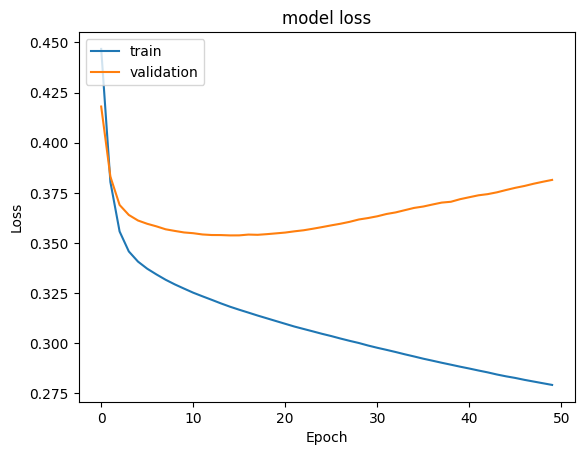

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model #1 Loss - Adam Optimizer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

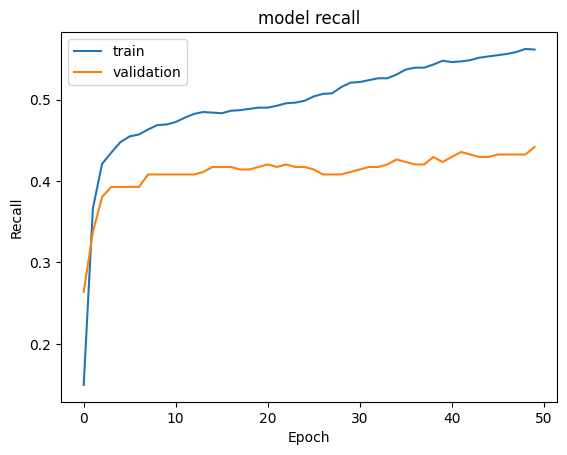

In [ ]:
#Plotting Train recall vs Validation recall (dict_keys(['loss', 'recall_1', 'val_loss', 'val_recall_1']))
plt.plot(history_1.history['recall_2'])
plt.plot(history_1.history['val_recall_2'])
plt.title('Model #1 Recall - Adam Optimizer')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
#lassification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5096
           1       0.84      0.55      0.66      1304

    accuracy                           0.89      6400
   macro avg       0.86      0.76      0.80      6400
weighted avg       0.88      0.89      0.88      6400



In [ ]:
#lassification report
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1274
           1       0.52      0.70      0.60       326

    accuracy                           0.81      1600
   macro avg       0.72      0.77      0.73      1600
weighted avg       0.83      0.81      0.82      1600



**Confusion matrix**

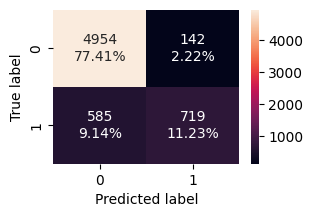

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

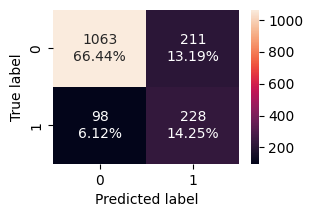

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

Observations:
- Notice the increase of True Positives (TP) from Training set to validation set.
- Also notice the decrease of False Negatives (FN) from Training set to Validation set!

### (2) Neural Network with <font size=5 color='#FF8C00'>Adam Optimizer</font> and <font size=5 color='#FF8C00'>Dropout</font> - - <font size=5 color='#4169E1'> <font size=3 color='#ADD8E6'>Model Performance Improvement</font>

Dropout is a regularization technique to prevent overfitting:

- Randomly “drops” neurons during training: At each training step, a random subset of neurons (and their connections) is “dropped” or temporarily deactivated. This forces the network to learn more robust patterns that don’t rely on specific neurons.
- Prevents overfitting: By randomly dropping neurons, the model cannot over-rely on any one feature or pattern, which helps it generalize better to unseen data, reducing overfitting.
- Improves performance: Dropout encourages the network to learn multiple independent features, improving overall model performance when deployed.

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the Neural Network with Adam Optimizer and Dropout
model_2 = Sequential()

# Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))

# Complete the code to add dropout with a ratio of 0.2
model_2.add(Dropout(0.2))

# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(64, activation='relu'))  # Example: 64 neurons with relu activation

# Complete the code to add another hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(64, activation='relu'))  # Example: Another 64 neurons with relu activation

# Complete the code to add dropout with a ratio of 0.1
model_2.add(Dropout(0.1))

# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(32, activation='relu'))  # Example: 32 neurons with relu activation

# Complete the code to add the number of neurons required in the output layer.
model_2.add(Dense(1, activation='sigmoid'))  # Example: 1 neuron for binary classification

In [ ]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
# Summary of the model
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,769 (34.25 KB)

 Trainable params: 8,769 (34.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train, y_train,
    batch_size=32,  # Specifying the batch size as 32
    epochs=100,  # Specifying the number of epochs as 100
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5021 - recall: 0.0325 - val_loss: 0.4224 - val_recall: 0.1227
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4207 - recall: 0.2949 - val_loss: 0.3781 - val_recall: 0.3129
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3894 - recall: 0.3801 - val_loss: 0.3680 - val_recall: 0.3497
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3774 - recall: 0.3914 - val_loss: 0.3653 - val_recall: 0.3558
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3698 - recall: 0.4001 - val_loss: 0.3625 - val_recall: 0.3558
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3622 - recall: 0.4099 - val_loss: 0.3605 - val_recall: 0.3834
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3591 - recall: 0.4113 - val_loss: 0.3622 - val_recall: 0.3804
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3610 - recall: 0.4424 - val_loss: 0.3590 - val_recall: 0.3896


In [ ]:
print(history_2.history.keys()) # Available keys in the history object for NN with Adam Optimizar:

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])


**Loss function**

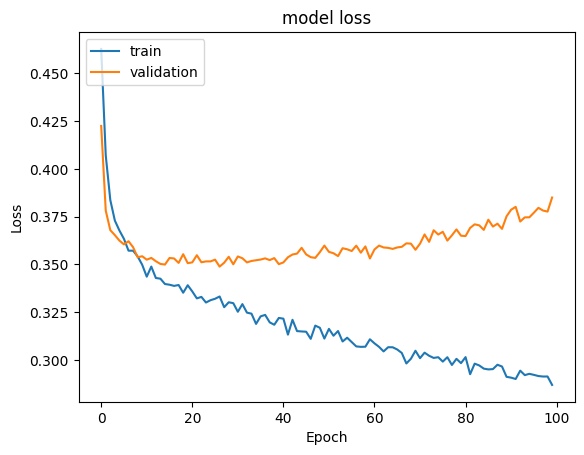

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model #2 Loss - Adam Optimizer + Dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observations:
- From the above plot, we can observe that the train and validation curves are having smooth decend lines. Reducing the number of neurons and adding dropouts to the model worked well, and the problem of overfitting was solved.

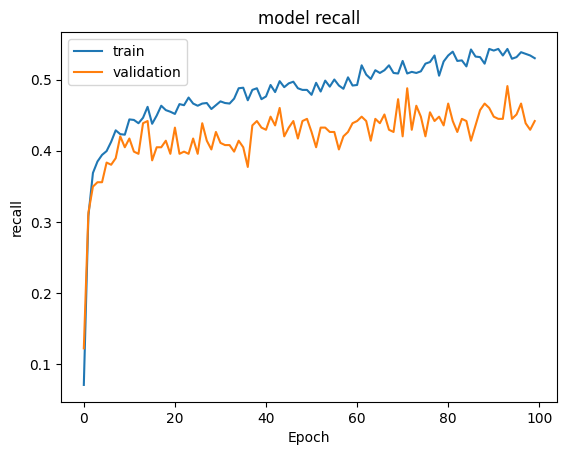

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('Model #2 Recall - Adam Optimizer + Dropout')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observations:
The Recall metric for the validation dataset is slightly under the training set but generally follows the same curve/noise.

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
# Training set classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5096
           1       0.85      0.61      0.71      1304

    accuracy                           0.90      6400
   macro avg       0.88      0.79      0.82      6400
weighted avg       0.89      0.90      0.89      6400



In [ ]:
# Predicting on the validation set
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)  # Thresholding the predictions

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Validation dataset classification report
from sklearn.metrics import classification_report
cr = classification_report(y_val, y_val_pred)  # y_val is the true labels, y_val_pred is the predicted labels
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1274
           1       0.68      0.44      0.54       326

    accuracy                           0.84      1600
   macro avg       0.77      0.69      0.72      1600
weighted avg       0.83      0.84      0.83      1600



**Confusion matrix**

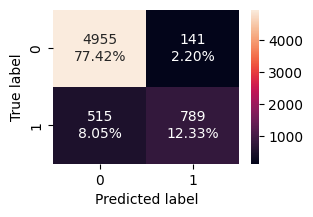

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

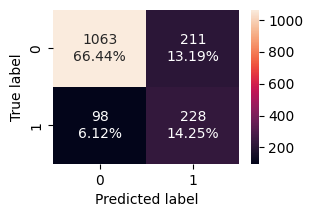

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

Observations:
- Classification predictions on the training set loss and Recall improved.
- Confusion matrix indicate both Predicted False Negatives declined and True Positives increased.
- Recall = TP/(TP+FN)
- This was a nice exercise!!

### (3) Neural Network with Balanced Data (by applying SMOTE) and <font size=5 color='#FF8C00'>SGD Optimizer</font> - - <font size=3 color='#ADD8E6'>Model Performance Improvement</font>

**Apply SMOTE to balance the dataset and then again apply hyperparamter tuning accordingly.**

In [ ]:
sm = SMOTE(random_state=42)
# Fitting SMOTE on the training data
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Printing the new shapes after upsampling
print('After UpSampling, the shape of X_train: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of y_train: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of X_train: (10192, 11)
After UpSampling, the shape of y_train: (10192,) 



Let's build a model with the balanced dataset

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the model
model_3 = Sequential()

# Adding the input layer with 32 neurons and relu activation function
model_3.add(Dense(32, activation='relu', input_dim=X_train_smote.shape[1]))

# Adding a hidden layer with 16 neurons and relu activation function
model_3.add(Dense(16, activation='relu'))

# Adding a hidden layer with 8 neurons and relu activation function
model_3.add(Dense(8, activation='relu'))

# Adding the output layer with 1 neuron and sigmoid activation function for binary classification
model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the ANN
history_3 = model_3.fit(
    X_train_smote,
    y_train_smote,
    batch_size=32,  # Specify the batch size, e.g., 32
    epochs=100,     # Specify the number of epochs, e.g., 100
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6979 - recall: 0.8124 - val_loss: 0.7129 - val_recall: 0.8190
Epoch 2/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6953 - recall: 0.8224 - val_loss: 0.7083 - val_recall: 0.8129
Epoch 3/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6928 - recall: 0.8207 - val_loss: 0.7036 - val_recall: 0.7883
Epoch 4/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6903 - recall: 0.8077 - val_loss: 0.6989 - val_recall: 0.7577
Epoch 5/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6878 - recall: 0.7895 - val_loss: 0.6942 - val_recall: 0.7454
Epoch 6/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6852 - recall: 0.7692 - val_loss: 0.6895 - val_recall: 0.7209
Epoch 7/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6825 - recall: 0.7516 - val_loss: 0.6846 - val_recall: 0.6933
Epoch 8/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6797 - recall: 0.7333 - val_loss: 0.6800 - val_recall: 0.6810


**Loss function**

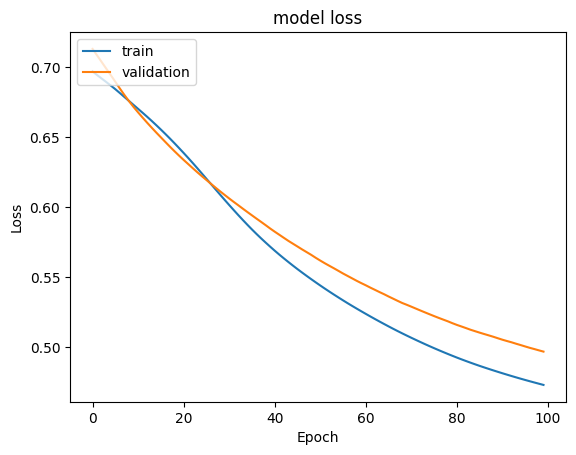

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model #3 Loss - SGD Optimizer + Balanced')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observations:
- Initially as the epoch runs executed the loss on the validation dataset was better with a smoot decline. However, the loss increased after the 20th epoch and ended far higher than with the training dataset.

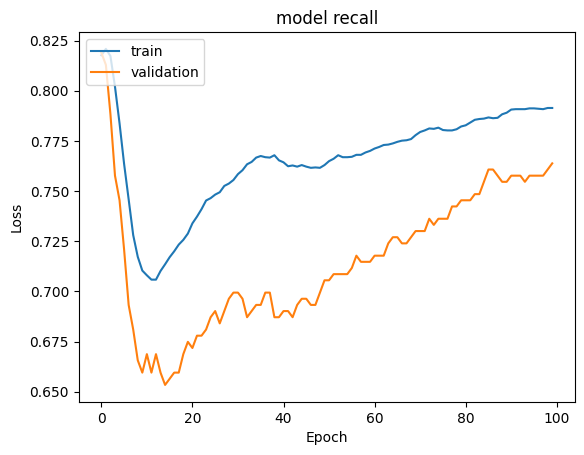

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('Model #3 Recall - SGD Optimizer + Balanced')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observations:
- Stochastic Gradient Descent with a Balanced data at starting minimized the Recall, however initially, the drop under the first 10 epochs was the most drastic probably as a result of applying the SMOTE to the starting data as only around the 15 epoch the Recall began to favorably increase albeit with noise on the validation set.
- A higher recall means fewer (FN) false negatives!!
- The Recall on the validation set was under but followed pretty close to the training set. --That's impressive!


In [ ]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      5096
           1       0.77      0.79      0.78      5096

    accuracy                           0.78     10192
   macro avg       0.78      0.78      0.77     10192
weighted avg       0.78      0.78      0.77     10192



In [ ]:
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1274
           1       0.42      0.76      0.55       326

    accuracy                           0.74      1600
   macro avg       0.67      0.75      0.68      1600
weighted avg       0.82      0.74      0.76      1600



**Confusion matrix**

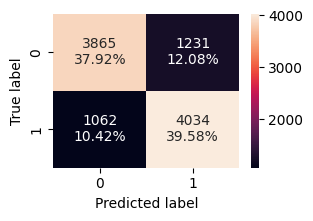

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

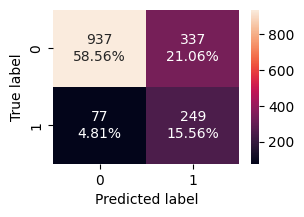

In [ ]:
#Calculating the confusion matrix

make_confusion_matrix(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set

Observations:
- Predicted True Positives (TP) successfully increased.
- Predicted False Negatives (FN) successfully decreased significantly with SMOTE balanced or a more uniformed starting data.
- Recall measures how many of the actual positive cases were correctly predicted, and false negatives represent the cases the model missed (failed to predict as positive). A higher recall means fewer false negatives.


### (4) Neural Network with Balanced Data (by applying SMOTE) and <font font size=5 color='#FF8C00'>Adam Optimizer</font> - - <font size=3 color='#ADD8E6'>Model Performance Improvement</font>

Let's build a model with the balanced dataset

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the model
model_4 = Sequential()

# Adding an input layer with 64 neurons and 'relu' as the activation function
model_4.add(Dense(64, activation='relu', input_dim=X_train_smote.shape[1]))

# Adding a hidden layer with 32 neurons and 'relu' as the activation function
model_4.add(Dense(32, activation='relu'))

# Adding another hidden layer with 16 neurons and 'relu' as the activation function
model_4.add(Dense(16, activation='relu'))

# Adding the output layer with 1 neuron and 'sigmoid' as the activation function
model_4.add(Dense(1, activation='sigmoid'))

In [ ]:
# Use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# Uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall() # TP/(TP+FN) therefore we want an increase of TPs and a decrease of FNs
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the ANN SMOTE and Adam Optimizer
history_4 = model_4.fit(
    X_train_smote, y_train_smote,
    batch_size=32,  # You can specify the batch size, e.g., 32
    epochs=100,     # You can specify the number of epochs, e.g., 100
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.5842 - recall: 0.7138 - val_loss: 0.5235 - val_recall: 0.7883
Epoch 2/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4544 - recall: 0.7830 - val_loss: 0.5017 - val_recall: 0.7669
Epoch 3/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4337 - recall: 0.7951 - val_loss: 0.4945 - val_recall: 0.7485
Epoch 4/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4217 - recall: 0.8005 - val_loss: 0.4897 - val_recall: 0.7423
Epoch 5/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4119 - recall: 0.8077 - val_loss: 0.4895 - val_recall: 0.7362
Epoch 6/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4030 - recall: 0.8118 - val_loss: 0.4897 - val_recall: 0.7270
Epoch 7/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3951 - recall: 0.8175 - val_loss: 0.4876 - val_recall: 0.7270
Epoch 8/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3878 - recall: 0.8214 - val_loss: 0.4920 - val_recall: 0.7270


**Loss function**

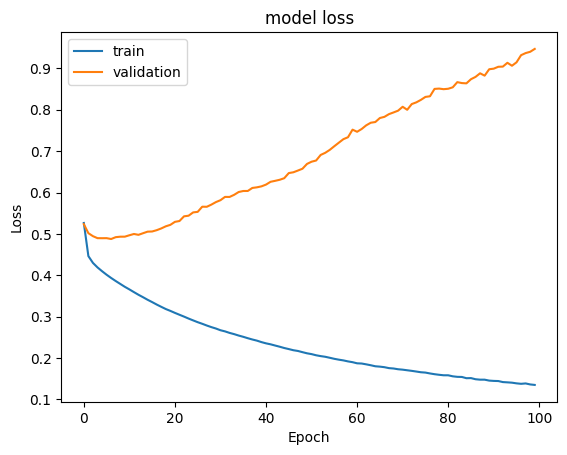

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Model #4 Loss - Adam Optimizer + Balanced')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observations:
- Interesting loss function here, it decreased in the Training set but increased with the Validation set...why?
- The loss curves do not follow each other.
- This loss is difficult to interpret for me.

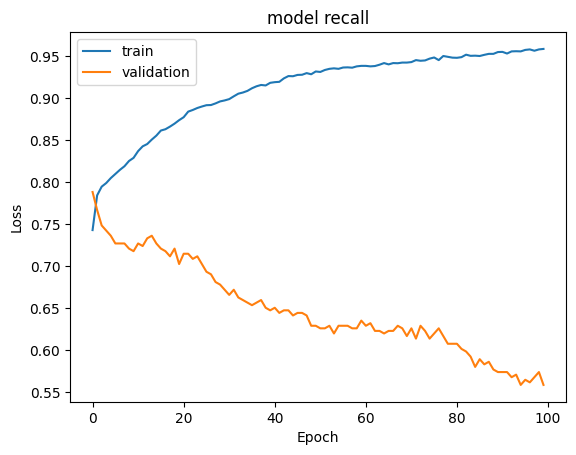

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('Model #4 Recall - Adam Optimizer + Balanced')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observations:
- What is going on with the Recall? It increased nicely during the training as expected, however with the validation --it was the opposite.

In [ ]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5096
           1       0.91      0.97      0.94      5096

    accuracy                           0.94     10192
   macro avg       0.94      0.94      0.94     10192
weighted avg       0.94      0.94      0.94     10192



In [ ]:
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1274
           1       0.45      0.56      0.50       326

    accuracy                           0.77      1600
   macro avg       0.67      0.69      0.68      1600
weighted avg       0.79      0.77      0.78      1600



**Confusion matrix**

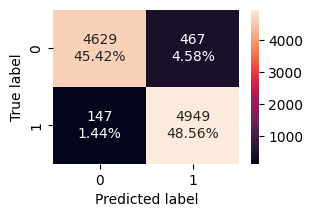

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

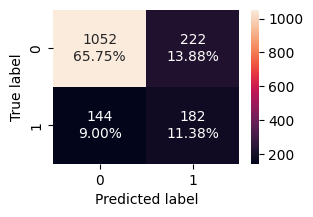

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

Observations:

- Predicted True Positives (TP) did not increase.
- Predicted False Negatives (FN) did not decrease with SMOTE balanced or a more uniformed starting data and the adaptive optimizer Adam.
- A higher recall means fewer false negatives. A decreasing Recall here with the validation set means the prediction wasn't successful.

### (5) Neural Network with Balanced Data (by applying SMOTE), <font size=5 color='#FF8C00'>Adam Optimizer</font>, and <font size=5 color='#FF8C00'>Dropout</font> - - <font size=3 color='#ADD8E6'>Model Performance Improvement</font>

Dropout is a regularization technique used in neural networks to prevent overfitting. Here’s a summary of what it does:

- Randomly “drops” neurons during training: At each training step, a random subset of neurons (and their connections) is “dropped” or temporarily deactivated. This forces the network to learn more robust patterns that don’t rely on specific neurons.
- Prevents overfitting: By randomly dropping neurons, the model cannot over-rely on any one feature or pattern, which helps it generalize better to unseen data, reducing overfitting.
- Improves performance: Dropout encourages the network to learn multiple independent features, improving overall model performance when deployed.


In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the model
model_5 = Sequential()
# Adding input layer with 32 neurons and relu as activation function
model_5.add(Dense(32, activation='relu', input_dim=X_train_smote.shape[1]))
# Adding dropout layer with a dropout rate of 0.2
model_5.add(Dropout(0.2))
# Adding hidden layer with 16 neurons and relu as activation function
model_5.add(Dense(16, activation='relu'))
# Adding dropout layer with a dropout rate of 0.2
model_5.add(Dropout(0.2))
# Adding hidden layer with 8 neurons with relu as activation function
model_5.add(Dense(8, activation='relu'))
# Adding the output layer with 1 neuron and sigmoid activation function
model_5.add(Dense(1, activation='sigmoid'))

In [ ]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_5 = model_5.fit(
    X_train_smote, y_train_smote,
    batch_size=32,  ## Specify the batch size to use (for example, 32)
    epochs=100,     ## Specify the number of epochs (for example, 100)
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.6356 - recall: 0.6616 - val_loss: 0.5559 - val_recall: 0.7423
Epoch 2/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5408 - recall: 0.7611 - val_loss: 0.5131 - val_recall: 0.7761
Epoch 3/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5135 - recall: 0.7510 - val_loss: 0.4854 - val_recall: 0.7607
Epoch 4/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4979 - recall: 0.7595 - val_loss: 0.4778 - val_recall: 0.7730
Epoch 5/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4838 - recall: 0.7709 - val_loss: 0.4710 - val_recall: 0.7393
Epoch 6/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4804 - recall: 0.7512 - val_loss: 0.4664 - val_recall: 0.7393
Epoch 7/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4667 - recall: 0.7729 - val_loss: 0.4639 - val_recall: 0.7393
Epoch 8/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4702 - recall: 0.7658 - val_loss: 0.4614 - val_recall: 0.7362


**Loss function**

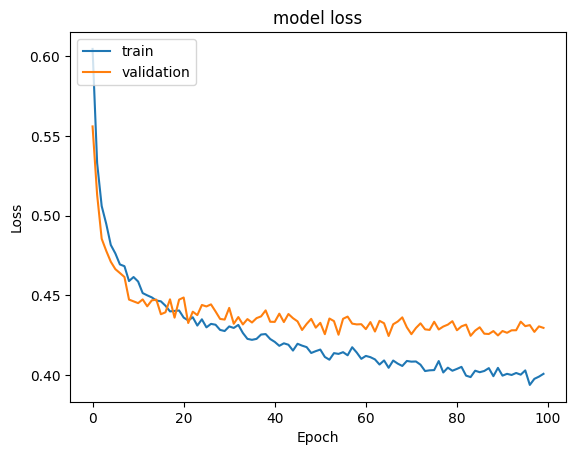

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('Model #5 Loss - Adam Opt + Balanced + Dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observations:

- Outstanding loss curve for both the Training and Validation sets.

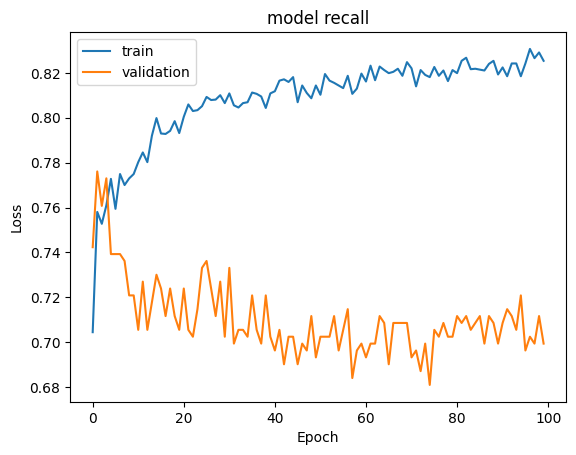

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('Model #5 Recall - Adam Opt + Balanced + Dropout')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observations:
- Recall does not look that great with the validation set.
- Adam optimizer with a Balanced data at starting and Droping some Neurons to improve the learning owith the training set was successful. However it minimized the Recall on the validation set again!  Not good!
- A higher recall means fewer (FN) false negatives with the Training set!!
- The Recall on the validation set was poor and noisy.


In [ ]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5096
           1       0.84      0.84      0.84      5096

    accuracy                           0.84     10192
   macro avg       0.84      0.84      0.84     10192
weighted avg       0.84      0.84      0.84     10192



In [ ]:
#classification report
cr=classification_report(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1274
           1       0.52      0.70      0.60       326

    accuracy                           0.81      1600
   macro avg       0.72      0.77      0.73      1600
weighted avg       0.83      0.81      0.82      1600



**Confusion matrix**

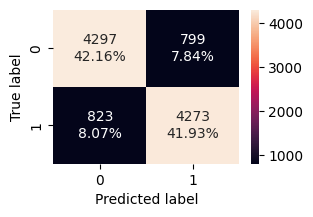

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

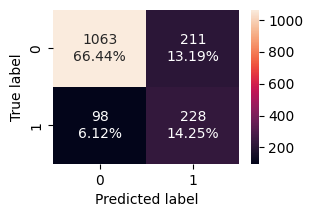

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

Observations:
- A lower (FN) false negatives with the Validation set!!
- Recall was decreased overall.
- Training set look optimistically agreeable as a valid approach.
- However the Validation set proved us wrong.

## <font size=5 color='#ADD8E6'>Model Performance Comparison and Final Model Selection --------------- Section</font>

In [ ]:
print("\nTraining performance comparison:")
train_metric_df

Training performance comparison


,recall
Neutral Network with SGD,0.325920
NN with Adam,0.551380
NN with Adam & Dropout,0.605061
NN with SMOTE & SGD,0.791601
NN with SMOTE & Adam,0.971154
"NN with SMOTE,Adam & Dropout",0.838501


Observations:
* The highest Recall (0.97) with the training predictions is with Model #5 (Balanced Data) SMOTE + Adam Optimizer. Great effort but NO COOKIE!! ;-)

In [ ]:
print("\nValidation set performance comparison:")
valid_metric_df

Validation set performance comparison


,recall
Neutral Network with SGD,0.291411
NN with Adam,0.441718
NN with Adam & Dropout,0.441718
NN with SMOTE & SGD,0.763804
NN with SMOTE & Adam,0.558282
"NN with SMOTE,Adam & Dropout",0.699387


Observations:
* <font color=ORANGE>The highest Recall value with the validation predictions is with Model #3 SMOTE + SGD at 0.763 </font>
* Slightly lower than with the highest Recall value (0.97) with the training predictions with Model #5 SMOTE + Adam.
* Depending on time and resources, additional models could be explored using the selected as the top most efficient model as the starting baseline.  For example Bayesian Networks and Principal Component Analysis (PCA) could be trained and compared against the baseline model.
* Additional hidden layers could be added to the already trained models to determine if better performance can be achieved.

In [ ]:
train_metric_df - valid_metric_df # Delta between training and validation Recall metric.

,recall
Neutral Network with SGD,0.034509
NN with Adam,0.109663
NN with Adam & Dropout,0.163344
NN with SMOTE & SGD,0.027798
NN with SMOTE & Adam,0.412872
"NN with SMOTE,Adam & Dropout",0.139114


Observations:
* <Font color=ORANGE>The smallest Recall Delta between the training and validation predictions is also with Model 3 SMOTE + SGD at 0.0277</font>

In [ ]:
print("Best NN Model is Model #3 NN + Balanced Data + SGD Optimizer")
y_test_pred = model_3.predict(X_test)    ## Complete the code to specify the best model "Model_0"
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [ ]:
# Classification Report Metrics on Unseen Data.
print("\nClassification Report Metrics on Unseen Data: \n")
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      1593
           1       0.43      0.77      0.55       407

    accuracy                           0.75      2000
   macro avg       0.68      0.76      0.69      2000
weighted avg       0.83      0.75      0.77      2000



A final Verification - Using the "winning NN model" predictions against the Test dataset:   ... Drum Roll please ... ;-)

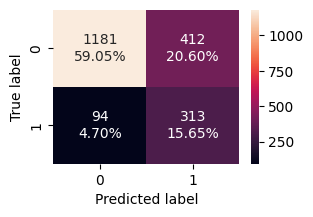

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

<font color=ORANGE>**Observations:**

- <font color=ORANGE>On unseen data (Test dataset) the predicted values matched the true data by 95.3% after training the model and reducing the number of False Positives down to 4.7%</font>
- <font color=ORANGE>The model trained best when optimized was Model 3 Balanced + SGD.</font>

## <font size=5 color='#ADD8E6'>Actionable Insights, Engineering and Business Recommendations ------------------------- Section </font>

<font color=ORANGE>Business Recommendations:</font>
- Use Model #3 A Neural Network with Balanced Data and SDG Optimizer to predict Customers likely to depart and exit the bank without saying proper goodbyes nor hugs. But seriously, this model was tested as as the best model to anticipate exits.
- Since most of the Customers if not all are based in Europe, the EU AI Act is required and must be followed.
- Once Corrective Actions are put in place, the model should be re-tested and reverified for efficiency in predicting Customer behavious that affect the bank. This should be done regularly as the data is likely to constantly grow.
- Engineering needs to provide with a User Acceptance Plan to ensure all business units can properly use the predictions properly and all Use Cases are well understood before going to production.
- IT must ensure data recovery after introducing the model into production.
- A Program Manager should capture all the recommendations from this report shown elsewhere to ensure a proper deployment, a cost analysis and the very importan resource allocations of computing resources.
- HR should be invited to review recommendations and insides from this report as they can provide invaluable help in assesing impact to current employees handling sensitive information.
- The bank should prioritize gender diversity initiatives with its vendors and coordinate all marketing similarly in its advertizing strategies, truth in lending, fairness and economic access to create a more balanced and inclusive clientele which can ultimately benefit the company's performance.
- Customer Support should analyze customer exits as they are likely to have experienced unfavorable transactions or help while trying to resolve issues.
- A Root Cause Corrective Action Committe made up of multiple function should review periodically all recommendations and test preventative actions to limit and decrease Customer exits.
- Training and Employee Development should consider offering upskilling or reskilling programs to preperly understand predictive models business process changes, current shortcomings and data impacts to increase business adaptation to these tools as this report recommends.

<font color=ORANGE>Engineering Recommendations:</font>
1. Release to a staging environment for functional acceptance testing, end-user acceptance testing, governance and regulatory compliance audits before going to production with the optimized Model #3 with Balanced + SGD Optimizer.
2. Preprocessing New Data: (New Customers without having the the true target values.)
	- Ensure that the new customer data is preprocessed in the same way as the training data. This includes handling missing values, normalizing or scaling features (e.g., using the same StandardScaler instance), and encoding categorical variables whenever applicable.
3. Using the Model for Predictions:
	- Use the trained model to predict outcomes for the new data. Call the predict() method on the model with the preprocessed new data.
```
new_customer_predictions = model.predict(new_customer_data)
```
4. Applying Threshold:
  - For binary classification tasks, we typically can apply a threshold to the predicted probabilities to determine class labels. Commonly, a threshold of 0.5 is used, but this can be adjusted based on business needs or the specific context of the problem.
```
new_customer_labels = (new_customer_predictions > 0.5).astype(int)
```
5. Interpreting the Predictions:
  - The resulting new_customer_labels can provide with the predicted class for each new customer. For example, in a churn prediction context, a label of 1 could indicate that a customer is likely to churn, while a label of 0 indicates they are likely to stay.
6. Further Evaluation (if possible):
  - When we eventually obtain the true target values for the new customers (e.g., after some time), we can evaluate the performance of our model on this new customer data using metrics like recall, precision, or F1-score as well.
7. Example PseudoCode:
```
  - Preprocessing new data
new_customer_data = preprocess_new_data(raw_new_customer_data)  

  - Predicting with the model
new_customer_predictions = model.predict(new_customer_data)

  - Applying a threshold to get class labels
new_customer_labels = (new_customer_predictions > 0.5).astype(int)

  - Displaying predictions
print("Predicted labels for new customers:", new_customer_labels)
```
8. Summary:

  - To preprocess the new data in a Staging or Production environments:
  - Use the trained model to predict probabilities,
  - Apply a threshold to classify the outcomes,
  - Interpret these predicted labels for further analysis or action.
  - This process allows making informed decisions regarding new customers, even in the absence of true target values not yet materialized.


Refer to APPENDIX I to determine how to best use this model in production.





#APPENDIX I

**How to use the model to predict outcome with new incoming data?**

When we have trained and validated a neural network (NN) model, and we want to predict values for new data (like new customers) without having the true target values, we follow these steps:

1. Preprocessing New Data:
	- Ensure that the new customer data is preprocessed in the same way as the training data. This includes handling missing values, normalizing or scaling features (e.g., using the same StandardScaler instance), and encoding categorical variables if applicable.

2. Using the Model for Predictions:
	- Use the trained model to predict outcomes for the new data. You can call the predict() method on the model with the preprocessed new data.


In [ ]:
# new_customer_predictions = model.predict(new_customer_data)

3. Applying Threshold:
	- For binary classification tasks, you will typically apply a threshold to the predicted probabilities to determine class labels. Commonly, a threshold of 0.5 is used, but this can be adjusted based on business needs or the specific context of the problem.

In [ ]:
# new_customer_labels = (new_customer_predictions > 0.5).astype(int)

4. Interpreting the Predictions:
	- The resulting new_customer_labels will provide you with the predicted class for each new customer. For example, in a churn prediction context, a label of 1 could indicate that a customer is likely to churn, while a label of 0 indicates they are likely to stay.
5. Further Evaluation (if possible):
	- If you eventually obtain the true target values for the new customers (e.g., after some time), you can evaluate the performance of your model on this new data using metrics like recall, precision, or F1-score.


Example Code:

In [ ]:
# Preprocessing new data
new_customer_data = preprocess_new_data(raw_new_customer_data)  # Apply necessary preprocessing steps

# Predicting with the model
new_customer_predictions = model.predict(new_customer_data)

# Applying a threshold to get class labels
new_customer_labels = (new_customer_predictions > 0.5).astype(int)

# Displaying predictions
print("Predicted labels for new customers:", new_customer_labels)

Summary:

We preprocess the new data, use the trained model to predict probabilities, apply a threshold to classify the outcomes, and then interpret these predicted labels for further analysis or action. This process allows making informed decisions regarding customers, even in the absence of true target values not yet materialized.



---


#NICE COLORS REFERENCE
Here's a reorganized list of the 105 color variations, grouped by similar color hues:

### **Blues:**

<font size=6 color='#00008B'>Power Ahead</font>
<font size=6 color='#0000CD'>Power Ahead</font>
<font size=6 color='#191970'>Power Ahead</font>
<font size=6 color='#4169E1'>Power Ahead</font>
<font size=6 color='#4682B4'>Power Ahead</font>
<font size=6 color='#6495ED'>Power Ahead</font>
<font size=6 color='#87CEFA'>Power Ahead</font>
<font size=6 color='#B0C4DE'>Power Ahead</font>
<font size=6 color='#ADD8E6'>Power Ahead</font>
<font size=6 color='#00CED1'>Power Ahead</font>
<font size=6 color='#00FFFF'>Power Ahead</font>
<font size=6 color='#E0FFFF'>Power Ahead</font>


### **Reds:**

<font size=6 color='#FF0000'>Power Ahead</font>
<font size=6 color='#DC143C'>Power Ahead</font>
<font size=6 color='#B22222'>Power Ahead</font>
<font size=6 color='#CD5C5C'>Power Ahead</font>
<font size=6 color='#FF6347'>Power Ahead</font>
<font size=6 color='#FF4500'>Power Ahead</font>
<font size=6 color='#C71585'>Power Ahead</font>
<font size=6 color='#FF69B4'>Power Ahead</font>
<font size=6 color='#FF1493'>Power Ahead</font>
<font size=6 color='#DB7093'>Power Ahead</font>
<font size=6 color='#F08080'>Power Ahead</font>


### **Purples:**

<font size=6 color='#800080'>Power Ahead</font>
<font size=6 color='#8B008B'>Power Ahead</font>
<font size=6 color='#4B0082'>Power Ahead</font>
<font size=6 color='#6A5ACD'>Power Ahead</font>
<font size=6 color='#9370DB'>Power Ahead</font>
<font size=6 color='#7B68EE'>Power Ahead</font>
<font size=6 color='#BA55D3'>Power Ahead</font>
<font size=6 color='#9400D3'>Power Ahead</font>
<font size=6 color='#DDA0DD'>Power Ahead</font>
<font size=6 color='#EE82EE'>Power Ahead</font>
<font size=6 color='#DA70D6'>Power Ahead</font>
<font size=6 color='#FF00FF'>Power Ahead</font>


### **Greens:**

<font size=6 color='#006400'>Power Ahead</font>
<font size=6 color='#008000'>Power Ahead</font>
<font size=6 color='#228B22'>Power Ahead</font>
<font size=6 color='#32CD32'>Power Ahead</font>
<font size=6 color='#3CB371'>Power Ahead</font>
<font size=6 color='#66CDAA'>Power Ahead</font>
<font size=6 color='#7FFFD4'>Power Ahead</font>
<font size=6 color='#00FF7F'>Power Ahead</font>
<font size=6 color='#00FA9A'>Power Ahead</font>
<font size=6 color='#ADFF2F'>Power Ahead</font>
<font size=6 color='#98FB98'>Power Ahead</font>
<font size=6 color='#90EE90'>Power Ahead</font>


### **Yellows/Oranges:**

<font size=6 color='#FFD700'>Power Ahead</font>
<font size=6 color='#FFFF00'>Power Ahead</font>
<font size=6 color='#FFA500'>Power Ahead</font>
<font size=6 color='#FF8C00'>Power Ahead</font>
<font size=6 color='#FFA07A'>Power Ahead</font>
<font size=6 color='#FFDAB9'>Power Ahead</font>
<font size=6 color='#FFE4B5'>Power Ahead</font>
<font size=6 color='#EEE8AA'>Power Ahead</font>
<font size=6 color='#FAFAD2'>Power Ahead</font>
<font size=6 color='#FFFACD'>Power Ahead</font>
<font size=6 color='#FFE4C4'>Power Ahead</font>
<font size=6 color='#FFF5EE'>Power Ahead</font>


### **Pinks/Magentas:**

<font size=6 color='#FFC0CB'>Power Ahead</font>
<font size=6 color='#FFB6C1'>Power Ahead</font>
<font size=6 color='#FF69B4'>Power Ahead</font>
<font size=6 color='#FF1493'>Power Ahead</font>
<font size=6 color='#FF00FF'>Power Ahead</font>
<font size=6 color='#FF33A6'>Power Ahead</font>
<font size=6 color='#DB7093'>Power Ahead</font>
<font size=6 color='#DA70D6'>Power Ahead</font>
<font size=6 color='#FF33FF'>Power Ahead</font>
<font size=6 color='#FFC0CB'>Power Ahead</font>
<font size=6 color='#FFDAB9'>Power Ahead</font>
<font size=6 color='#FFE4E1'>Power Ahead</font>


### **Grays/Neutral Tones:**

<font size=6 color='#808080'>Power Ahead</font>
<font size=6 color='#A9A9A9'>Power Ahead</font>
<font size=6 color='#D3D3D3'>Power Ahead</font>
<font size=6 color='#DCDCDC'>Power Ahead</font>
<font size=6 color='#F5F5F5'>Power Ahead</font>
<font size=6 color='#E0E0E0'>Power Ahead</font>
<font size=6 color='#F0F8FF'>Power Ahead</font>
<font size=6 color='#FAEBD7'>Power Ahead</font>
<font size=6 color='#FFFAF0'>Power Ahead</font>
<font size=6 color='#F8F8FF'>Power Ahead</font>
<font size=6 color='#F0FFFF'>Power Ahead</font>
<font size=6 color='#FAF0E6'>Power Ahead</font>


### **Browns:**

<font size=6 color='#A52A2A'>Power Ahead</font>
<font size=6 color='#8B4513'>Power Ahead</font>
<font size=6 color='#D2691E'>Power Ahead</font>
<font size=6 color='#CD853F'>Power Ahead</font>
<font size=6 color='#DEB887'>Power Ahead</font>
<font size=6 color='#F5DEB3'>Power Ahead</font>
<font size=6 color='#FFE4B5'>Power Ahead</font>
<font size=6 color='#BC8F8F'>Power Ahead</font>
<font size=6 color='#B8860B'>Power Ahead</font>
<font size=6 color='#DAA520'>Power Ahead</font>
<font size=6 color='#FFE4C4'>Power Ahead</font>
<font size=6 color='#FFDAB9'>Power Ahead</font>
```

This categorization organizes colors by their general hue families. You can now use these groupings to display colors more cohesively!

# APPENDIX II

Building an Artificial Neural Network (ANN)
1. Define the Problem and Architecture
Problem: Clearly understand the task (classification, regression, etc.) and the input/output data.
Architecture: Choose the number of layers, neurons per layer, and activation functions. Consider factors like complexity and computational resources.
2. Initialize Weights and Biases
Random initialization: Assign random values to the weights and biases. Common methods include Xavier initialization or He initialization.
3. Forward Propagation
Input layer: Feed the input data to the network.
Hidden layers: Calculate the weighted sum of inputs and biases for each neuron, then apply the activation function.
Output layer: Compute the final output using the same process.
4. Calculate the Loss
Loss function: Choose a suitable loss function based on the problem (e.g., mean squared error for regression, cross-entropy for classification).
Compute loss: Calculate the difference between the predicted output and the actual target.
5. Backpropagation
Chain rule: Use the chain rule to calculate the gradients of the loss with respect to the weights and biases.
Update weights and biases: Adjust the weights and biases in the direction that minimizes the loss.
6. Optimization
Optimizer: Select an optimization algorithm (e.g., gradient descent, Adam, RMSprop) to update the weights and biases efficiently.
Learning rate: Set the learning rate to control the step size during updates.
7. Training
Epochs: Iterate through the entire dataset multiple times (epochs).
Mini-batches: Divide the dataset into smaller batches to reduce computational cost and improve generalization.
Forward pass, loss calculation, backpropagation, and optimization: Repeat these steps for each mini-batch.
8. Evaluation
Validation set: Use a separate validation set to assess the model's performance during training.
Metrics: Choose appropriate metrics (e.g., accuracy, precision, recall, F1-score) based on the problem.
Overfitting: Monitor for overfitting (when the model performs well on the training set but poorly on the validation set).
Example: Building a Multi-Layer Perceptron (MLP) for Image Classification
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input image
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 classes (for MNIST)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
Key Points:

Activation functions: Choose appropriate activation functions (e.g., ReLU, sigmoid, tanh) based on the layer and problem.
Multi-layers: Adding more layers can improve model complexity and learning capacity.
Loss functions: Select a loss function that aligns with the problem's objective.
Training and optimization: Experiment with different optimizers and learning rates to find the best configuration.
Backpropagation: Efficiently calculate gradients to update the model's parameters.
Evaluation: Use appropriate metrics to assess the model's performance and identify potential issues.

# APPENDIX III

Utility Functions:

In [ ]:
#Printing the summary.
model.summary()

Model: "sequential"
_________________________________________________________________

 Layer (type)  |              Output Shape   |           Param #   

=================================================================

 dense (Dense)  |             (None, 10)       |         7850      
                                                                 
=================================================================
* Total params: 7850 (30.66 KB)
* Trainable params: 7850 (30.66 KB)
* Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

In [ ]:
batch_size = x_train.shape[0]
epochs = 10

# time.time() returns the time in seconds since Thu Jan 1 00:00:00 1970.
start = time.time()

# Fitting the model.
history = model.fit(
    x_train, y_train,
    validation_data=(x_val,y_val),
    batch_size=batch_size,
    epochs=epochs
)

# time.time() returns the time in seconds since Thu Jan 1 00:00:00 1970.
end = time.time()


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 2.3785 - accuracy: 0.0933 - val_loss: 2.3576 - val_accuracy: 0.1019
Epoch 2/10
1/1 [==============================] - 0s 269ms/step - loss: 2.3633 - accuracy: 0.0996 - val_loss: 2.3429 - val_accuracy: 0.1081

Epoch 3/10
1/1 [==============================] - 0s 303ms/step - loss: 2.3485 - accuracy: 0.1053 - val_loss: 2.3286 - val_accuracy: 0.1159

Epoch 4/10
1/1 [==============================] - 0s 279ms/step - loss: 2.3342 - accuracy: 0.1115 - val_loss: 2.3148 - val_accuracy: 0.1224

Epoch 5/10
1/1 [==============================] - 0s 196ms/step - loss: 2.3203 - accuracy: 0.1180 - val_loss: 2.3014 - val_accuracy: 0.1286

Epoch 6/10
1/1 [==============================] - 0s 227ms/step - loss: 2.3068 - accuracy: 0.1244 - val_loss: 2.2882 - val_accuracy: 0.1342

Epoch 7/10
1/1 [==============================] - 0s 306ms/step - loss: 2.2936 - accuracy: 0.1313 - val_loss: 2.2755 - val_accuracy: 0.1408

Epoch 8/10
1/1 [==============================] - 0s 177ms/step - loss: 2.2807 - accuracy: 0.1380 - val_loss: 2.2630 - val_accuracy: 0.1480

Epoch 9/10
1/1 [==============================] - 0s 201ms/step - loss: 2.2682 - accuracy: 0.1455 - val_loss: 2.2508 - val_accuracy: 0.1554

Epoch 10/10
1/1 [==============================] - 0s 193ms/step - loss: 2.2559 - accuracy: 0.1527 - val_loss: 2.2388 - val_accuracy: 0.1628

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  4.701591730117798

In [ ]:
ef plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
plot(history,'loss')

Nice plot here

In [ ]:
plot(history,'accuracy')

Nice plot here

In [ ]:
results.loc[0] = [0,'-','-',10,50000,history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

	# hidden layers	# neurons - hidden layer	activation function - hidden layer	# epochs	batch size	train loss	validation loss	train accuracy	validation accuracy	time (secs)
  0	0	-	-	10	50000	2.255868	2.238811	0.1527	0.1628	4.7


## Importing Libraries Reference

In [ ]:
 Numerical and statistical libraries: -------------------------------------

# Importing the pandas library, which provides data structures
# and functions needed to manipulate structured data more easily.
# Pandas is useful for working with data in DataFrame format,
# which is similar to a table in a database or an Excel spreadsheet.
import pandas as pd

# Importing the numpy library, which adds support for large,
# multi-dimensional arrays and matrices, along with a
# collection of mathematical functions to operate on these arrays.
# Numpy is useful for numerical computations, manipulating data,
# performing complex mathematical operations, and conducting
# powerful statistical analyses.
import numpy as np

# Data visualization libraries: ------------------------------------------

# Importing the pyplot module from the matplotlib library,
# which is a plotting library used for creating static, interactive,
# and animated visualizations in Python.
# Matplotlib provides a wide range of plotting capabilities,
# including line plots, scatter plots, bar charts, histograms, and more.
# The pyplot module provides a MATLAB-like interface,
# making it easy to create and customize plots.
import matplotlib.pyplot as plt

# Importing the seaborn library, which is built on top of matplotlib
# and provides a high-level interface for drawing attractive
# and informative statistical graphics.
# Seaborn offers built-in themes and color palettes to make it easy to create
# visually appealing plots.
# It is particularly useful for visualizing complex datasets,
# with functions for creating heatmaps, time series plots,
# and more advanced statistical visualizations.
import seaborn as sns


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# ============================================================================
# Typical sequence to build a ML prediction model using Decision Trees:
#
# 1- Select an attribute of data and make all possible splits in data.
# 2- Calculate the Gini impurity after each split.
# 3- Repeat the steps for every attribute present in the data.
# 4- Decide the best split based on the lowest Gini impurity.
# 5- Repeat the complete process until the stopping criterion is reached or
#    the tree has achieved homogeneity in leaves.
#
# Decision Tree Classifier & Modelling Libraries: ----------------------------

# ML Library to split data
from sklearn.model_selection import train_test_split

# ML Algorythm to build model for prediction using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# ML Algorythm to visualize Decision Tree
from sklearn.tree import plot_tree

# ML Algorythm function to get feature importance:
# It offers decision tree algorithms for both classification and regression tasks.
# Decision trees can be used to determine feature importance,
# which indicates how influential each feature is in making predictions.
from sklearn import tree

# ML Algorythm function to get feature importance Part II:
# Importing the permutation_importance function from the sklearn.inspection module.
# Function calculates feature importance by evaluating the decrease
# in a model's performance when the values of a feature are randomly shuffled.
# Permutation importance is a model-agnostic method, meaning it can be used
# with any trained model to assess the importance of features.
from sklearn.inspection import permutation_importance as pmp


# ML Decision Tree Algorythms Metric scores definitions:
'''
=========> Accuracy:
Description: The ratio of correctly predicted instances to the total instances.
Power: Measures the overall effectiveness of the model.

=========> Precision:
Description: The ratio of true positive predictions to the total predicted positives.
Power: Indicates how many of the predicted positive instances are actually positive.

=========> Recall (Sensitivity):
Description: The ratio of true positive predictions to the total actual positives.
Power: Measures the model's ability to identify all relevant instances.

=========> F1 Score:
Description: The harmonic mean of precision and recall.
Power: Provides a single metric that balances precision and recall,
       useful for imbalanced datasets.

=========> ROC-AUC (Receiver Operating Characteristic - Area Under the Curve):
Description: Represents the model's ability to distinguish between classes,
             plotted as true positive rate versus false positive rate.
Power: Evaluates the trade-off between sensitivity and specificity
             across different thresholds.

=========> Mean Squared Error (MSE):
Description: The average squared difference between predicted and actual values.
Power: Penalizes larger errors more than smaller ones,
       providing a clear indication of model accuracy.

=========> Root Mean Squared Error (RMSE):
Description: The square root of the average squared difference between
             predicted and actual values.
Power: Offers a measure of the model's prediction error in the same units
             as the target variable.

=========> Mean Absolute Error (MAE):
Description: The average absolute difference between predicted and actual values.
Power: Provides a straightforward measure of prediction accuracy w
       ithout emphasizing large errors.

=========> R-squared (Coefficient of Determination):
Description: The proportion of the variance in the dependent variable
             that is predictable from the independent variables.
Power: Indicates the goodness-of-fit of the model, showing how well the model
       explains the variability of the target variable.
'''


# ML Algorythm function to get these metric scores
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    make_scorer,
    confusion_matrix
)

# ML Algorythm to finetune different models
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

Excel Spreadsheet displayed

In [ ]:
## Statistical summary of the data. Round-off to two decimal spaces and transpose for easier reading:
data.describe().round(2).T

	count	mean	std	min	25%	50%	75%	max
ID	5000.0	2500.50	1443.52	1.0	1250.75	2500.5	3750.25	5000.0
Age	5000.0	45.34	11.46	23.0	35.00	45.0	55.00	67.0
Experience	5000.0	20.10	11.47	-3.0	10.00	20.0	30.00	43.0
Income	5000.0	73.77	46.03	8.0	39.00	64.0	98.00	224.0
ZIPCode	5000.0	93169.26	1759.46	90005.0	91911.00	93437.0	94608.00	96651.0
Family	5000.0	2.40	1.15	1.0	1.00	2.0	3.00	4.0
CCAvg	5000.0	1.94	1.75	0.0	0.70	1.5	2.50	10.0
Education	5000.0	1.88	0.84	1.0	1.00	2.0	3.00	3.0
Mortgage	5000.0	56.50	101.71	0.0	0.00	0.0	101.00	635.0
Personal_Loan	5000.0	0.10	0.29	0.0	0.00	0.0	0.00	1.0
Securities_Account	5000.0	0.10	0.31	0.0	0.00	0.0	0.00	1.0
CD_Account	5000.0	0.06	0.24	0.0	0.00	0.0	0.00	1.0
Online	5000.0	0.60	0.49	0.0	0.00	1.0	1.00	1.0
CreditCard	5000.0	0.29	0.46	0.0	0.00	0.0	1.00	1.0


In [ ]:
# Improved

# Specify the column name
column_name = 'Age'

# ANSI escape codes for bold and orange
bold_orange = "\033[1;33m"  # Bold + Orange
reset = "\033[0m"  # Reset to normal

# Print the column name, unique values, and data type with formatting
print(f"Column: {bold_orange}{column_name}{reset}")
print(f"Unique values in '{column_name}' column: {data[column_name].unique()}") # Non-repeating values listed:
print(f"Data type of '{column_name}' column: {bold_orange}{data[column_name].dtype}{reset}")

Column: Age YELLOW
Unique values in 'Age' column: [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Data type of 'Age' column: int64 YELLOW

In [ ]:
# pip install colorama

In [ ]:
from IPython.display import display, HTML

u_tri = '\u25B2'  # (▲)
d_tri = '\u25BC'  # (▼)
l_tri = '\u25C0' # (◀)
r_tri = '\u25B6' # (▶)

display(HTML(f'We look for a loss decrease <span style="color: red;">{d_tri}</span> and recall increase <span style="color: green;">{u_tri}</span> both for training and validation sets:'))

# APPENDIX IV

ILLUSTRATING FORWARD PROPAGATION AND BACK PROPAGATION ON ANN :-)

In [2]:
# Forward Propagation Illustration - Utility Function

import time
import sys

# ANSI color codes
RED = "\033[31m"
GREEN = "\033[32m"
ORANGE = "\033[33m"
RESET = "\033[0m"

# Forward Propagation Illustration
print("\nIllustration of -Forward Propagation- by Activation Functions at each neuron based on the strenght of importance or weights between nodes.")

# Function to animate dashes with color choice, moving towards a fixed [*] position, and stop after a timeout
def animate_dashes_with_fixed_asterisk(total_time=10, speed=0.1, color="RED"):
    # Choose color based on user input
    if color == "RED":
        dash_color = RED
    elif color == "GREEN":
        dash_color = GREEN
    elif color == "ORANGE":
        dash_color = ORANGE
    else:
        dash_color = RESET  # Default to no color if an invalid option is given

    width = 10  # Initial width of dashes
    fixed_pos = 45  # Fixed position for the asterisk [*]
    start_time = time.time()  # Record the starting time

    while time.time() - start_time < total_time:
        # Calculate remaining space before the asterisk [*]
        remaining_space = fixed_pos - width - 3  # 3 accounts for the length of [*]

        if remaining_space < 0:
            remaining_space = 0  # Stop growing dashes once they reach [*]

        # Use carriage return '\r' to return to the start of the line and overwrite the previous output
        sys.stdout.write(f"\r{GREEN}[* neuron layer_i *] {dash_color}{'-' * width}{' ' * remaining_space}{ORANGE}[* neuron layer_i+1 *]{RESET}")
        sys.stdout.flush()  # Force output to appear immediately
        time.sleep(speed)   # Control the speed of the animation

        if remaining_space == 0:
            width = 10  # Reset width after dashes meet [*] to restart animation
        else:
            width += 1  # Increase the number of dashes for movement effect

    # After the timeout ends, clear the line and stop
    sys.stdout.write("\r" + " " * (fixed_pos + 3) + "\r")
    sys.stdout.flush()

# Run the animation (set timeout in seconds and specify color: "RED", "GREEN", or "ORANGE")
animate_dashes_with_fixed_asterisk(total_time=10, speed=0.08, color="GREEN")

# Leave the illustration completed without animation
print(f"\r{GREEN}[* neuron layer_i *]{GREEN} ----------------------------------------- {ORANGE}[* neuron layer_i+1 *]")


Illustration of -Forward Propagation- by Activation Functions at each neuron based on the strenght of importance or weights between nodes.
[* neuron layer_i *] ----------------------------------------- [* neuron layer_i+1 *]


In [3]:
# Back Propagation Illustration - Utility Function

import time
import sys

# ANSI color codes
RED = "\033[31m"
GREEN = "\033[32m"
ORANGE = "\033[33m"
RESET = "\033[0m"

print("\nIllustration of -Back Propagation- to nodes with stronger influence after wights are updated with a keras Optimizer")

# Function to animate dashes moving from right to left, with "updated weight" in the middle
def animate_dashes_with_weight_in_middle(total_time=10, speed=0.1, asterisk_color="GREEN", dash_color="RED"):
    # Choose dash color based on user input
    if dash_color == "RED":
        dash_color = RED
    elif dash_color == "GREEN":
        dash_color = GREEN
    elif dash_color == "ORANGE":
        dash_color = ORANGE
    else:
        dash_color = RESET  # Default to no color if an invalid option is given

    # Choose asterisk color
    if asterisk_color == "RED":
        asterisk_color = RED
    elif asterisk_color == "GREEN":
        asterisk_color = GREEN
    elif asterisk_color == "ORANGE":
        asterisk_color = ORANGE
    else:
        asterisk_color = RESET  # Default to no color if an invalid option is given

    dash_width = 46  # Starting width of the dashes
    fixed_pos = 46  # Position where the asterisk [*] will stay fixed
    word = " updated weight "
    word_length = len(word)
    start_time = time.time()  # Record the starting time

    while time.time() - start_time < total_time:
        # Calculate the remaining space for the dashes
        remaining_space = fixed_pos - dash_width - 3  # 3 accounts for the length of [*]

        # Calculate the position to place the word in the middle
        total_length = dash_width + len(word) + 3  # Total length including dashes and word
        word_position = (total_length // 2) - (word_length // 2)  # Center the word

        # Create the dashes string
        dashes = '-' * dash_width

        # Insert the word into the dashes at the calculated position
        if word_position < dash_width:
            dashes = dashes[:word_position] + word + dashes[word_position + word_length:]

        # Print the line with dashes shrinking toward the asterisk [*]
        sys.stdout.write(f"\r{asterisk_color}[* neuron layer_i *] {dash_color}{dashes}{' ' * remaining_space}{RESET}")
        sys.stdout.flush()  # Force the output to appear immediately
        time.sleep(speed)   # Control the speed of the animation

        if dash_width == 0:
            dash_width = 45  # Reset dash width after dashes shrink to 0
        else:
            dash_width -= 1  # Decrease the number of dashes for the leftward effect

    # After timeout ends, clear the line and stop
    sys.stdout.write("\r" + " " * (fixed_pos + 3) + "\r")
    sys.stdout.flush()

# Run the animation (set timeout in seconds and specify colors)
animate_dashes_with_weight_in_middle(total_time=10, speed=0.08, asterisk_color="GREEN", dash_color="RED")

# Leave the illustration completed without animation
print(f"\r{GREEN}[* neuron layer_i *]{RED} <---------------------------------------- {ORANGE}[* neuron layer_i+1 *]")


Illustration of -Back Propagation- to nodes with stronger influence after wights are updated with a keras Optimizer
[* neuron layer_i *] <---------------------------------------- [* neuron layer_i+1 *]


In [19]:
message = "Essentially:\nHow fast the global minimum is found (by Error Loss) is a function of the chosen Keras optimizers \n" \
          "during the backflow propagation with updated weights and strengths of signals between neurons."

# Run the animation (set timeout in seconds and specify color: "RED", "GREEN", or "ORANGE")
animate_dashes_with_fixed_asterisk(total_time=5, speed=0.08, color="GREEN")
print(f"\r{GREEN}[* neuron layer_i *]{GREEN} ----------------------------------------- {ORANGE}[* neuron layer_i+1 *]")

# Run the animation (set timeout in seconds and specify colors)
animate_dashes_with_weight_in_middle(total_time=5, speed=0.08, asterisk_color="GREEN", dash_color="RED")
print(f"\r{GREEN}[* neuron later_i *]{RED} <---------------------------------------- {ORANGE}[* neuron layer_i+1 *]{RESET}")

print(message)

[* neuron layer_i *] ----------------------------------------- [* neuron layer_i+1 *]
[* neuron later_i *] <---------------------------------------- [* neuron layer_i+1 *]
Essentially:
How fast the global minimum is found (by Error Loss) is a function of the chosen Keras optimizers 
during the backflow propagation with updated weights and strengths of signals between neurons.
